In [1]:
import pandas as pd
import os 
import sys
import requests
import json
import io
import matplotlib as plt
%pylab inline

# User defined function that reads in API key. See folder for sample file. 
from censusAPI import myAPI 

Populating the interactive namespace from numpy and matplotlib


/Users/rspd/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Creating Master Geography File

Census Tracts Relationship Files: https://www.census.gov/geo/maps-data/data/centract_rel.html

In [2]:
tracts = pd.read_csv("census_geo_converter.txt")
print(tracts.shape)
tracts['state&county'] = tracts['STATEFP'].astype(str) + '_' + tracts['COUNTYFP'].astype(str)
tracts['state&county&tract'] = tracts['STATEFP'].astype(str) + '_' + tracts['COUNTYFP'].astype(str) + '_' + tracts['TRACTCE'].astype(str)
print(tracts.shape)
print(tracts['state&county&tract'].nunique())
tracts['state&tract'] = tracts['STATEFP'].astype(str) + '_' + tracts['TRACTCE'].astype(str)
print(tracts['state&tract'].nunique())
tracts.head()

(74091, 4)
(74091, 6)
74091
54973


,STATEFP,COUNTYFP,TRACTCE,PUMA5CE,state&county,state&county&tract,state&tract
0,1,1,20100,2100,1_1,1_1_20100,1_20100
1,1,1,20200,2100,1_1,1_1_20200,1_20200
2,1,1,20300,2100,1_1,1_1_20300,1_20300
3,1,1,20400,2100,1_1,1_1_20400,1_20400
4,1,1,20500,2100,1_1,1_1_20500,1_20500


In [3]:
cbsa = pd.read_excel("list1.xls", skiprows=2)
cbsa.dropna(subset = ['FIPS County Code', 'FIPS State Code'], inplace=True)
cbsa['FIPS County Code'] = cbsa['FIPS County Code'].astype(int)
cbsa['FIPS State Code'] = cbsa['FIPS State Code'].astype(int)
cbsa['state&county'] = cbsa['FIPS State Code'].astype(str) + '_' + cbsa['FIPS County Code'].astype(str)
cbsa.dropna(subset=['CSA Code'], inplace=True)
print(cbsa['CSA Code'].nunique())
print(cbsa['state&county'].nunique())
cbsa.head()

174
1231


,CBSA Code,Metropolitan Division Code,CSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Metropolitan Division Title,CSA Title,County/County Equivalent,State Name,FIPS State Code,FIPS County Code,Central/Outlying County,state&county
7,10260,NaN,434.0,"Adjuntas, PR",Micropolitan Statistical Area,NaN,"Ponce-Coamo-Santa Isabel, PR",Adjuntas Municipio,Puerto Rico,72,1,Central,72_1
8,10300,NaN,220.0,"Adrian, MI",Micropolitan Statistical Area,NaN,"Detroit-Warren-Ann Arbor, MI",Lenawee County,Michigan,26,91,Central,26_91
18,10420,NaN,184.0,"Akron, OH",Metropolitan Statistical Area,NaN,"Cleveland-Akron-Canton, OH",Portage County,Ohio,39,133,Central,39_133
19,10420,NaN,184.0,"Akron, OH",Metropolitan Statistical Area,NaN,"Cleveland-Akron-Canton, OH",Summit County,Ohio,39,153,Central,39_153
26,10540,NaN,440.0,"Albany, OR",Metropolitan Statistical Area,NaN,"Portland-Vancouver-Salem, OR-WA",Linn County,Oregon,41,43,Central,41_43


In [4]:
cbsa2 = cbsa[['CSA Code', 'state&county', 'CSA Title']]
cbsa2.head()

,CSA Code,state&county,CSA Title
7,434.0,72_1,"Ponce-Coamo-Santa Isabel, PR"
8,220.0,26_91,"Detroit-Warren-Ann Arbor, MI"
18,184.0,39_133,"Cleveland-Akron-Canton, OH"
19,184.0,39_153,"Cleveland-Akron-Canton, OH"
26,440.0,41_43,"Portland-Vancouver-Salem, OR-WA"


** CSA for each region** 

Codes retrieved from: https://api.census.gov/data/2016/acs/acsse?get=K200001_001E,NAME&for=combined%20statistical%20area:*

In [5]:
# in order by population of metropolitan area 

ny = "408"
la = "348"
chi = "176"
dal = "206"
hou = "288"
phl = "428"
wdc = "548"
mia = "370"
atl = "122"
bos = "148"
sfo = "488"
mke = "376" #not in the top 10 of populations, but just interested 

csa = [ny, la, chi, dal, hou, phl, wdc, mia, atl, bos, sfo, mke]

In [6]:
geographies = tracts.merge(cbsa2, on='state&county')
geographies['CSA Code'] = geographies['CSA Code'].astype(int)
print(geographies.shape)
geographies.head()

(55490, 9)


,STATEFP,COUNTYFP,TRACTCE,PUMA5CE,state&county,state&county&tract,state&tract,CSA Code,CSA Title
0,1,3,10100,2600,1_3,1_3_10100,1_10100,380,"Mobile-Daphne-Fairhope, AL"
1,1,3,10200,2600,1_3,1_3_10200,1_10200,380,"Mobile-Daphne-Fairhope, AL"
2,1,3,10300,2600,1_3,1_3_10300,1_10300,380,"Mobile-Daphne-Fairhope, AL"
3,1,3,10400,2600,1_3,1_3_10400,1_10400,380,"Mobile-Daphne-Fairhope, AL"
4,1,3,10500,2600,1_3,1_3_10500,1_10500,380,"Mobile-Daphne-Fairhope, AL"


In [7]:
geographies = geographies[geographies['CSA Code'].astype(str).isin(csa)]
print(geographies.shape)
geographies.head()

(24702, 9)


,STATEFP,COUNTYFP,TRACTCE,PUMA5CE,state&county,state&county&tract,state&tract,CSA Code,CSA Title
1339,6,1,420100,101,6_1,6_1_420100,6_420100,488,"San Jose-San Francisco-Oakland, CA"
1340,6,1,420200,101,6_1,6_1_420200,6_420200,488,"San Jose-San Francisco-Oakland, CA"
1341,6,1,420300,101,6_1,6_1_420300,6_420300,488,"San Jose-San Francisco-Oakland, CA"
1342,6,1,420400,101,6_1,6_1_420400,6_420400,488,"San Jose-San Francisco-Oakland, CA"
1343,6,1,420500,101,6_1,6_1_420500,6_420500,488,"San Jose-San Francisco-Oakland, CA"


In [8]:
geographies['TRACTCE'].nunique()

15221

In [9]:
tract_lst = list(geographies['TRACTCE'])
len(tract_lst)

24702

In [10]:
pop_var = 'B01001_001E'
word = "Pop"
url = "https://api.census.gov/data/2016/acs/acs5?get=NAME," + pop_var +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
pop_df = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(pop_df.shape)
pop_df = pop_df[pop_df['combined statistical area'].isin(csa)]
pop_df = pop_df.rename(columns={pop_var : 'Population', 
                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
pop_df.drop('Unnamed: 3', axis=1, inplace=True)
print(pop_df.shape)
pop_df

(174, 4)
(12, 3)


,CSA_Name,Population,CSA
5,"Atlanta--Athens-Clarke County--Sandy Springs, ...",6258653,122
12,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",8096628,148
22,"Chicago-Naperville, IL-IN-WI CSA",9902385,176
33,"Dallas-Fort Worth, TX-OK CSA",7389674,206
63,"Houston-The Woodlands, TX CSA",6679518,288
89,"Los Angeles-Long Beach, CA CSA",18463122,348
101,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",6558445,370
103,"Milwaukee-Racine-Waukesha, WI CSA",2042566,376
115,"New York-Newark, NY-NJ-CT-PA CSA",23568545,408
125,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",7158466,428


In [11]:
# pop_df.to_csv("pop_df.csv")

# Retrieving Census Data

ctrl + f commuting
https://api.census.gov/data/2016/acs/acs5/subject/variables.html

Useful Reference for querying census api https://api.census.gov/data/2016/acs/acsse/examples.html


### Average Travel Time to Work

In [12]:
meanTT_var = 'S0801_C01_046E'  
word = "Time"
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + meanTT_var +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
meanTT_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(meanTT_total.shape)
meanTT_total = meanTT_total[meanTT_total['combined statistical area'].isin(csa)]
meanTT_total = meanTT_total.rename(columns={meanTT_var : 'Total_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
meanTT_total.drop('Unnamed: 3', axis=1, inplace=True)
print(meanTT_total.shape)
#meanTT_total

(174, 4)
(12, 3)


In [13]:
meanTT_m_var = "S0801_C02_046E"
word = "Time"
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + meanTT_m_var +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
meanTT_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(meanTT_m.shape)
meanTT_m = meanTT_m[meanTT_m['combined statistical area'].isin(csa)]
meanTT_m = meanTT_m.rename(columns={meanTT_m_var : 'Male_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
meanTT_m.drop('Unnamed: 3', axis=1, inplace=True)
print(meanTT_m.shape)
# meanTT_m

(174, 4)
(12, 3)


In [14]:
meanTT_f_var = 'S0801_C03_046E'  
word = "Time"
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + meanTT_f_var +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
meanTT_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(meanTT_f.shape)
meanTT_f = meanTT_f[meanTT_f['combined statistical area'].isin(csa)]
meanTT_f = meanTT_f.rename(columns={meanTT_f_var : 'Female_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
meanTT_f.drop('Unnamed: 3', axis=1, inplace=True)
print(meanTT_f.shape)
# meanTT_f

(174, 4)
(12, 3)


In [15]:
meanTT = pd.merge(meanTT_total[['CSA_Name', 'CSA', 'Total_Time']], meanTT_m[['CSA', 'Male_Time']])
meanTT = meanTT.merge(meanTT_f[['CSA', 'Female_Time']])
meanTT

,CSA_Name,CSA,Total_Time,Male_Time,Female_Time
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,30.4,31.7,28.9
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,29.0,30.7,27.1
2,"Chicago-Naperville, IL-IN-WI CSA",176,31.0,32.5,29.4
3,"Dallas-Fort Worth, TX-OK CSA",206,27.7,29.1,25.9
4,"Houston-The Woodlands, TX CSA",288,29.3,31.1,27.1
5,"Los Angeles-Long Beach, CA CSA",348,29.9,31.4,28.2
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,28.3,29.2,27.3
7,"Milwaukee-Racine-Waukesha, WI CSA",376,23.2,24.4,22.0
8,"New York-Newark, NY-NJ-CT-PA CSA",408,34.7,36.3,33.0
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,28.5,30.1,26.8


/Users/rspd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


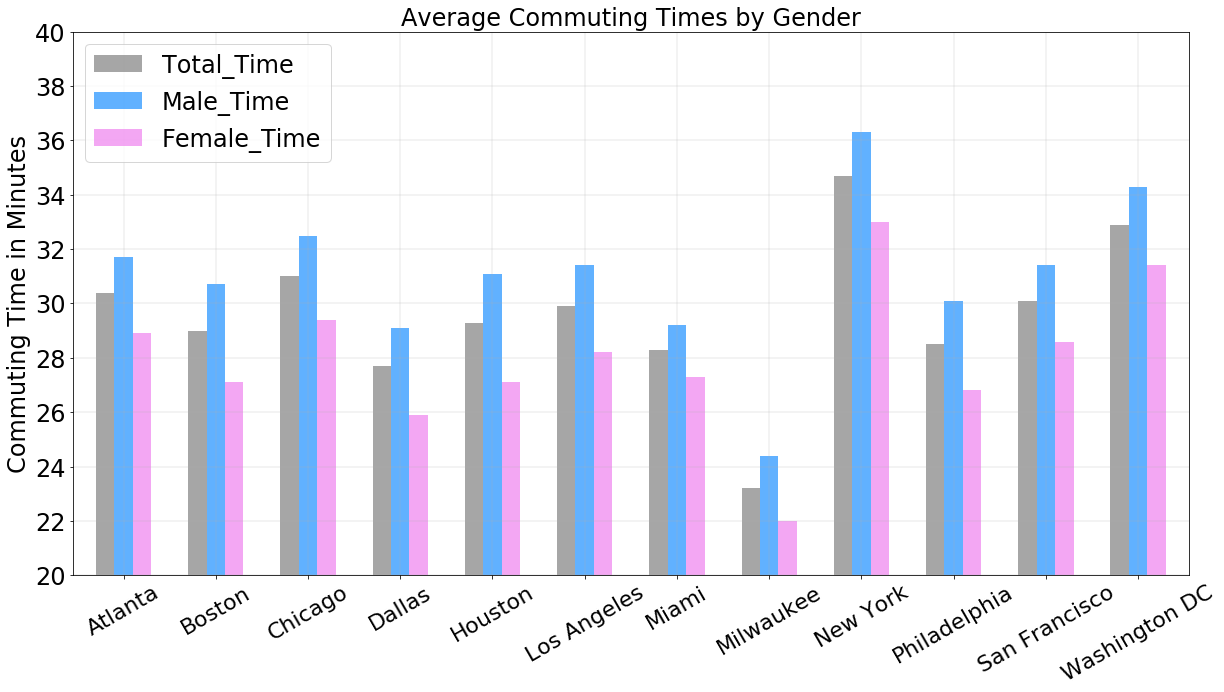

In [16]:
meanTT.plot(x='CSA_Name', y=['Total_Time', 'Male_Time', 'Female_Time'],
            kind='bar', figsize=(20,10), ylim=(20,40), color=['grey', 'dodgerblue', 'violet'],
           title='Average Commuting Times By Gender', fontsize=24, width=0.6, alpha=0.7)
plt.xlabel("")
plt.ylabel("Commuting Time in Minutes", fontsize=24)
plt.title("Average Commuting Times by Gender", fontsize=24)
plt.grid(linewidth=0.3)
plt.yticks(np.arange(20, 41, step=2))
plt.xticks(arange(12), ('Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles', 'Miami', 
                        'Milwaukee', 'New York', 'Philadelphia', 'San Francisco', 'Washington DC'), 
                        fontsize=22, rotation=30)
plt.legend(loc='upper left', prop={'size' : 24})
plt.savefig("commutetimes.png")
plt.show()

In [17]:
meanTT['Diff'] = meanTT['Male_Time'] - meanTT['Female_Time']
meanTT.sort_values('Diff', ascending=False)

,CSA_Name,CSA,Total_Time,Male_Time,Female_Time,Diff
4,"Houston-The Woodlands, TX CSA",288,29.3,31.1,27.1,4.0
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,29.0,30.7,27.1,3.6
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,28.5,30.1,26.8,3.3
8,"New York-Newark, NY-NJ-CT-PA CSA",408,34.7,36.3,33.0,3.3
3,"Dallas-Fort Worth, TX-OK CSA",206,27.7,29.1,25.9,3.2
5,"Los Angeles-Long Beach, CA CSA",348,29.9,31.4,28.2,3.2
2,"Chicago-Naperville, IL-IN-WI CSA",176,31.0,32.5,29.4,3.1
11,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...",548,32.9,34.3,31.4,2.9
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,30.4,31.7,28.9,2.8
10,"San Jose-San Francisco-Oakland, CA CSA",488,30.1,31.4,28.6,2.8


In [18]:
meanTT['Diff'].mean()

3.041666666666666

In [19]:
meanTT['Male_Time'].mean()

31.016666666666666

In [20]:
meanTT['Female_Time'].mean()

27.974999999999998

# Mode of Transport: Car

In [21]:
variable = 'S0801_C01_002E'  
word = 'Car'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_car_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_car_total.shape)
mode_car_total = mode_car_total[mode_car_total['combined statistical area'].isin(csa)]
mode_car_total = mode_car_total.rename(columns={variable : 'Total_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_car_total.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_car_total.shape)
# mode_car_total

(174, 4)
(12, 3)


In [22]:
variable = 'S0801_C02_002E'
word = 'Car'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_car_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_car_m.shape)
mode_car_m = mode_car_m[mode_car_m['combined statistical area'].isin(csa)]
mode_car_m = mode_car_m.rename(columns={variable : 'Male_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_car_m.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_car_m.shape)
# mode_car_m

(174, 4)
(12, 3)


In [23]:
variable = 'S0801_C03_002E'  
word = 'Car'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_car_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_car_f.shape)
mode_car_f = mode_car_f[mode_car_f['combined statistical area'].isin(csa)]
mode_car_f = mode_car_f.rename(columns={variable : 'Female_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_car_f.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_car_f.shape)
# mode_car_f

(174, 4)
(12, 3)


In [24]:
mode_car = pd.merge(mode_car_total[['CSA_Name', 'CSA', 'Total_Car']], mode_car_m[['CSA', 'Male_Car']])
mode_car = mode_car.merge(mode_car_f[['CSA', 'Female_Car']])
mode_car['Diff'] = mode_car['Male_Car'] - mode_car['Female_Car']
print("The average for all cities and genders is:", mode_car['Total_Car'].mean())
mode_car.sort_values('Diff', ascending=False)

The average for all cities and genders is: 82.68333333333332


,CSA_Name,CSA,Total_Car,Male_Car,Female_Car,Diff
8,"New York-Newark, NY-NJ-CT-PA CSA",408,61.1,62.2,59.9,2.3
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,82.0,82.8,81.2,1.6
11,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...",548,79.4,80.1,78.7,1.4
5,"Los Angeles-Long Beach, CA CSA",348,86.0,86.5,85.3,1.2
10,"San Jose-San Francisco-Oakland, CA CSA",488,77.1,77.7,76.5,1.2
2,"Chicago-Naperville, IL-IN-WI CSA",176,79.2,79.7,78.6,1.1
4,"Houston-The Woodlands, TX CSA",288,91.0,91.3,90.6,0.7
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,80.7,80.9,80.5,0.4
7,"Milwaukee-Racine-Waukesha, WI CSA",376,89.3,89.4,89.1,0.3
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,88.2,88.1,88.4,-0.3


/Users/rspd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


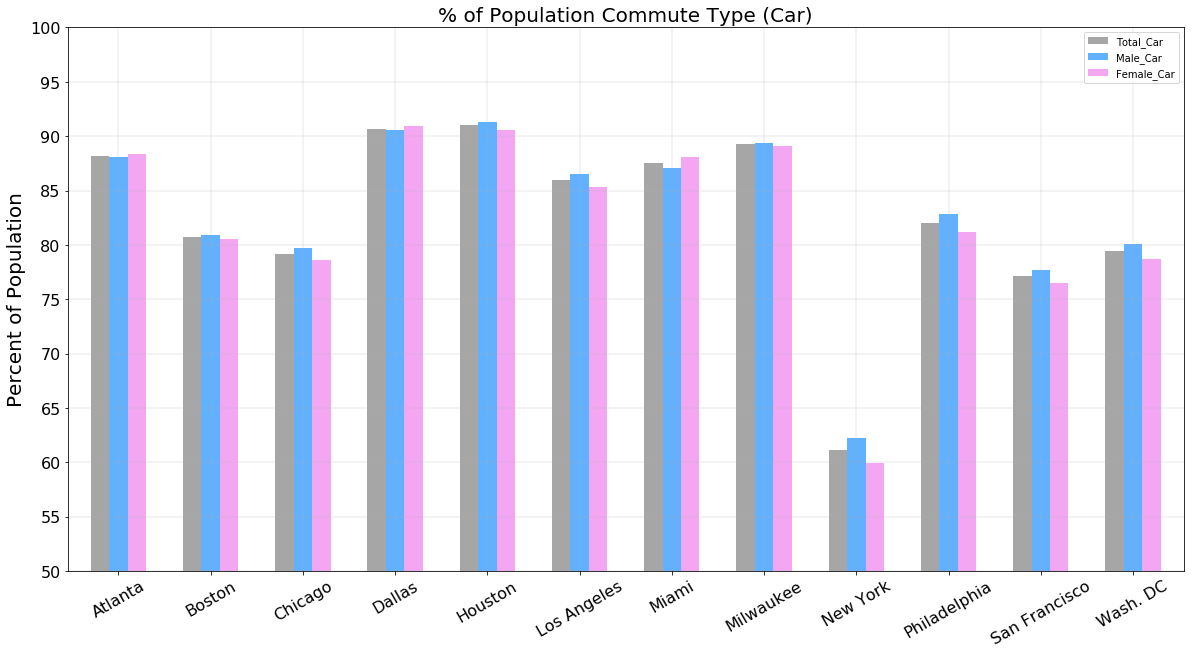

In [25]:
mode_car.plot(x='CSA_Name', y=['Total_Car', 'Male_Car', 'Female_Car'],
              kind='bar', figsize=(20,10), ylim=(50,100), color=['grey', 'dodgerblue', 'violet'],
              fontsize=16, width=0.6, alpha=0.7)
plt.xlabel("")
plt.ylabel("Percent of Population", fontsize=20)
plt.title("% of Population Commute Type (Car)", fontsize=20)
plt.grid(linewidth=0.3)
plt.yticks(np.arange(50, 101, step=5))
plt.xticks(arange(12), ('Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles', 'Miami', 
                        'Milwaukee', 'New York', 'Philadelphia', 'San Francisco', 'Wash. DC'), 
                        fontsize='16', rotation=30)
plt.show()

#### Mean Travel Time to Work (Mode: Car)

In [26]:
variable = 'S0802_C02_090E'  
word = 'Car_Time'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_car_time = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_car_time.shape)
mode_car_time = mode_car_time[mode_car_time['combined statistical area'].isin(csa)]
mode_car_time = mode_car_time.rename(columns={variable : word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_car_time.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_car_time.shape)
print("The mean travel time by car is", mode_car_time['Car_Time'].mean())
mode_car_time

(174, 4)
(12, 3)
The mean travel time by car is 27.950000000000006


,CSA_Name,Car_Time,CSA
5,"Atlanta--Athens-Clarke County--Sandy Springs, ...",29.6,122
12,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",27.7,148
22,"Chicago-Naperville, IL-IN-WI CSA",29.0,176
33,"Dallas-Fort Worth, TX-OK CSA",27.1,206
63,"Houston-The Woodlands, TX CSA",28.8,288
89,"Los Angeles-Long Beach, CA CSA",28.8,348
101,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",27.4,370
103,"Milwaukee-Racine-Waukesha, WI CSA",22.8,376
115,"New York-Newark, NY-NJ-CT-PA CSA",28.7,408
125,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",27.1,428


# CSA Mode of Transport: Public Transportation

In [27]:
variable = 'S0801_C01_009E'  
word = "PubTran"
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_public_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_public_total.shape)
mode_public_total = mode_public_total[mode_public_total['combined statistical area'].isin(csa)]
mode_public_total = mode_public_total.rename(columns={variable : 'Total_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_public_total.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_public_total.shape)
# mode_public_total

(174, 4)
(12, 3)


In [28]:
variable = 'S0801_C02_009E'  
word = "PubTran"
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_public_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_public_m.shape)
mode_public_m = mode_public_m[mode_public_m['combined statistical area'].isin(csa)]
mode_public_m = mode_public_m.rename(columns={variable : 'Male_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_public_m.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_public_m.shape)
# mode_public_m

(174, 4)
(12, 3)


In [29]:
variable = 'S0801_C03_009E'  
word = "PubTran"
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_public_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_public_f.shape)
mode_public_f = mode_public_f[mode_public_f['combined statistical area'].isin(csa)]
mode_public_f = mode_public_f.rename(columns={variable : 'Female_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_public_f.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_public_f.shape)
# mode_public_f

(174, 4)
(12, 3)


In [30]:
mode_public = pd.merge(mode_public_total[['CSA_Name', 'CSA', 'Total_PubTran']], mode_public_m[['CSA', 'Male_PubTran']])
mode_public = mode_public.merge(mode_public_f[['CSA', 'Female_PubTran']])
mode_public['Diff'] = mode_public['Female_PubTran'] - mode_public['Male_PubTran']
mode_public.sort_values('Diff', ascending=False)

,CSA_Name,CSA,Total_PubTran,Male_PubTran,Female_PubTran,Diff
8,"New York-Newark, NY-NJ-CT-PA CSA",408,27.1,26.0,28.3,2.3
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,8.6,7.6,9.6,2.0
2,"Chicago-Naperville, IL-IN-WI CSA",176,11.4,10.7,12.2,1.5
11,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...",548,11.0,10.3,11.8,1.5
10,"San Jose-San Francisco-Oakland, CA CSA",488,10.4,9.9,11.1,1.2
5,"Los Angeles-Long Beach, CA CSA",348,4.4,4.1,4.9,0.8
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,3.6,3.2,4.0,0.8
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,8.5,8.2,8.8,0.6
4,"Houston-The Woodlands, TX CSA",288,2.2,2.0,2.5,0.5
7,"Milwaukee-Racine-Waukesha, WI CSA",376,3.0,2.8,3.2,0.4


In [31]:
mode_public2 = mode_public.merge(pop_df[['CSA', 'Population']], on='CSA')
mode_public2['Perct_total'] = mode_public2['Total_PubTran'] / 100
mode_public2['Perct_male'] = mode_public2['Male_PubTran'] / 100
mode_public2['Perct_female'] = mode_public2['Female_PubTran'] / 100
mode_public2['PubTran_Pop'] = mode_public2['Perct_total'] * mode_public2['Population']
mode_public2['PubTran_Pop_m'] = mode_public2['Perct_male'] * mode_public2['Population']
mode_public2['PubTran_Pop_f'] = mode_public2['Perct_female'] * mode_public2['Population']
mode_public2['Pop_diff'] = mode_public2['PubTran_Pop_f'].astype(int) - mode_public2['PubTran_Pop_m'].astype(int)
mode_public2.sort_values('Pop_diff', ascending=False)

,CSA_Name,CSA,Total_PubTran,Male_PubTran,Female_PubTran,Diff,Population,Perct_total,Perct_male,Perct_female,PubTran_Pop,PubTran_Pop_m,PubTran_Pop_f,Pop_diff
8,"New York-Newark, NY-NJ-CT-PA CSA",408,27.1,26.0,28.3,2.3,23568545,0.271,0.260,0.283,6387075.695,6127821.700,6669898.235,542077
2,"Chicago-Naperville, IL-IN-WI CSA",176,11.4,10.7,12.2,1.5,9902385,0.114,0.107,0.122,1128871.890,1059555.195,1208090.970,148535
5,"Los Angeles-Long Beach, CA CSA",348,4.4,4.1,4.9,0.8,18463122,0.044,0.041,0.049,812377.368,756988.002,904692.978,147704
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,8.6,7.6,9.6,2.0,7158466,0.086,0.076,0.096,615628.076,544043.416,687212.736,143169
11,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...",548,11.0,10.3,11.8,1.5,9518995,0.110,0.103,0.118,1047089.450,980456.485,1123241.410,142785
10,"San Jose-San Francisco-Oakland, CA CSA",488,10.4,9.9,11.1,1.2,8574623,0.104,0.099,0.111,891760.792,848887.677,951783.153,102896
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,3.6,3.2,4.0,0.8,6558445,0.036,0.032,0.040,236104.020,209870.240,262337.800,52467
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,8.5,8.2,8.8,0.6,8096628,0.085,0.082,0.088,688213.380,663923.496,712503.264,48580
4,"Houston-The Woodlands, TX CSA",288,2.2,2.0,2.5,0.5,6679518,0.022,0.020,0.025,146949.396,133590.360,166987.950,33397
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,2.8,2.7,3.0,0.3,6258653,0.028,0.027,0.030,175242.284,168983.631,187759.590,18776


/Users/rspd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


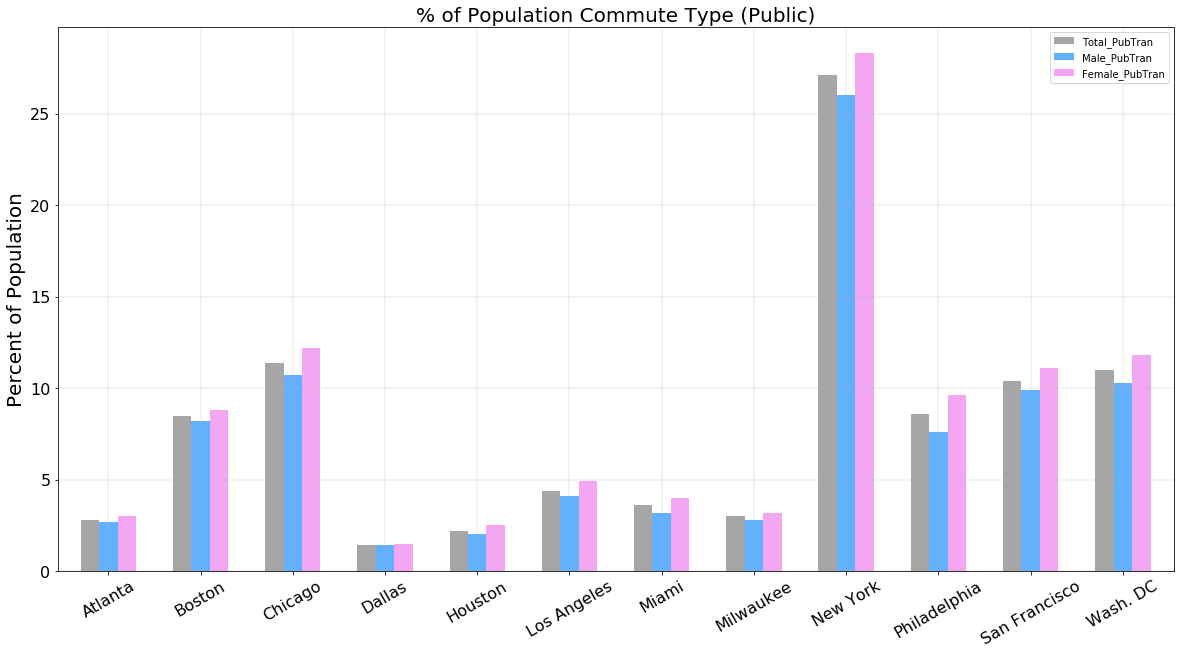

In [32]:
mode_public.plot(x='CSA_Name', y=['Total_PubTran', 'Male_PubTran', 'Female_PubTran'],
                 kind='bar', figsize=(20,10), color=['gray', 'dodgerblue', 'violet'],
                 fontsize=16, width=0.6, alpha=0.7)
plt.xlabel("")
plt.ylabel("Percent of Population", fontsize=20)
plt.title("% of Population Commute Type (Public)", fontsize=20)
plt.grid(linewidth=0.3)
#plt.yticks(np.arange(50, 101, step=5))
plt.xticks(arange(12), ('Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles', 'Miami', 
                        'Milwaukee', 'New York', 'Philadelphia', 'San Francisco', 'Wash. DC'), 
                        fontsize='16', rotation=30)
plt.show()

#### Mean Travel Time to Work (Mode: Public Transit)

In [33]:
variable = 'S0802_C04_090E'  
word = 'PubTran_Time'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_PubTran_time = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_PubTran_time.shape)
mode_PubTran_time = mode_PubTran_time[mode_PubTran_time['combined statistical area'].isin(csa)]
mode_PubTran_time = mode_PubTran_time.rename(columns={variable : word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_PubTran_time.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_PubTran_time.shape)
mode_PubTran_time

(174, 4)
(12, 3)


,CSA_Name,PubTran_Time,CSA
5,"Atlanta--Athens-Clarke County--Sandy Springs, ...",53.0,122
12,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",47.7,148
22,"Chicago-Naperville, IL-IN-WI CSA",49.6,176
33,"Dallas-Fort Worth, TX-OK CSA",52.6,206
63,"Houston-The Woodlands, TX CSA",49.6,288
89,"Los Angeles-Long Beach, CA CSA",51.7,348
101,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",50.7,370
103,"Milwaukee-Racine-Waukesha, WI CSA",43.6,376
115,"New York-Newark, NY-NJ-CT-PA CSA",52.2,408
125,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",47.3,428


In [34]:
mode_car_PubTran = mode_car_time.merge(mode_PubTran_time[['PubTran_Time', 'CSA']], on='CSA')
cols = ['CSA_Name', 'CSA', 'Car_Time', 'PubTran_Time']
mode_car_PubTran = mode_car_PubTran[cols]
mode_car_PubTran

,CSA_Name,CSA,Car_Time,PubTran_Time
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,29.6,53.0
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,27.7,47.7
2,"Chicago-Naperville, IL-IN-WI CSA",176,29.0,49.6
3,"Dallas-Fort Worth, TX-OK CSA",206,27.1,52.6
4,"Houston-The Woodlands, TX CSA",288,28.8,49.6
5,"Los Angeles-Long Beach, CA CSA",348,28.8,51.7
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,27.4,50.7
7,"Milwaukee-Racine-Waukesha, WI CSA",376,22.8,43.6
8,"New York-Newark, NY-NJ-CT-PA CSA",408,28.7,52.2
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,27.1,47.3


# CSA Mode of Transport: Walked

In [35]:
variable = 'S0801_C01_010E'  
word = 'Walk'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_walk_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_walk_total.shape)
mode_walk_total = mode_walk_total[mode_walk_total['combined statistical area'].isin(csa)]
mode_walk_total = mode_walk_total.rename(columns={variable : 'Total_' + word, 'combined statistical area' : 'CSA','NAME' : 'CSA_Name'})
mode_walk_total.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_walk_total.shape)
# mode_walk_total

(174, 4)
(12, 3)


In [36]:
variable = 'S0801_C02_010E'  
word = 'Walk'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_walk_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_walk_m.shape)
mode_walk_m = mode_walk_m[mode_walk_m['combined statistical area'].isin(csa)]
mode_walk_m = mode_walk_m.rename(columns={variable : 'Male_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_walk_m.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_walk_m.shape)
# mode_walk_m

(174, 4)
(12, 3)


In [37]:
variable = 'S0801_C03_010E'  
word = 'Walk'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_walk_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_walk_f.shape)
mode_walk_f = mode_walk_f[mode_walk_f['combined statistical area'].isin(csa)]
mode_walk_f = mode_walk_f.rename(columns={variable : 'Female_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_walk_f.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_walk_f.shape)
# mode_walk_f

(174, 4)
(12, 3)


In [38]:
mode_walk = pd.merge(mode_walk_total[['CSA_Name', 'CSA', 'Total_Walk']], mode_walk_m[['CSA', 'Male_Walk']])
mode_walk = mode_walk.merge(mode_walk_f[['CSA', 'Female_Walk']])
mode_walk['Diff'] = mode_walk['Female_Walk'] - mode_walk['Male_Walk']
mode_walk.sort_values('Diff', ascending=False)

,CSA_Name,CSA,Total_Walk,Male_Walk,Female_Walk,Diff
8,"New York-Newark, NY-NJ-CT-PA CSA",408,5.5,5.3,5.8,0.5
10,"San Jose-San Francisco-Oakland, CA CSA",488,3.5,3.3,3.7,0.4
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,4.4,4.2,4.6,0.4
5,"Los Angeles-Long Beach, CA CSA",348,2.3,2.2,2.5,0.3
2,"Chicago-Naperville, IL-IN-WI CSA",176,3.1,3.0,3.2,0.2
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,3.7,3.6,3.7,0.1
7,"Milwaukee-Racine-Waukesha, WI CSA",376,2.8,2.7,2.8,0.1
4,"Houston-The Woodlands, TX CSA",288,1.4,1.4,1.4,0.0
3,"Dallas-Fort Worth, TX-OK CSA",206,1.3,1.3,1.2,-0.1
11,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...",548,3.0,3.1,3.0,-0.1


/Users/rspd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


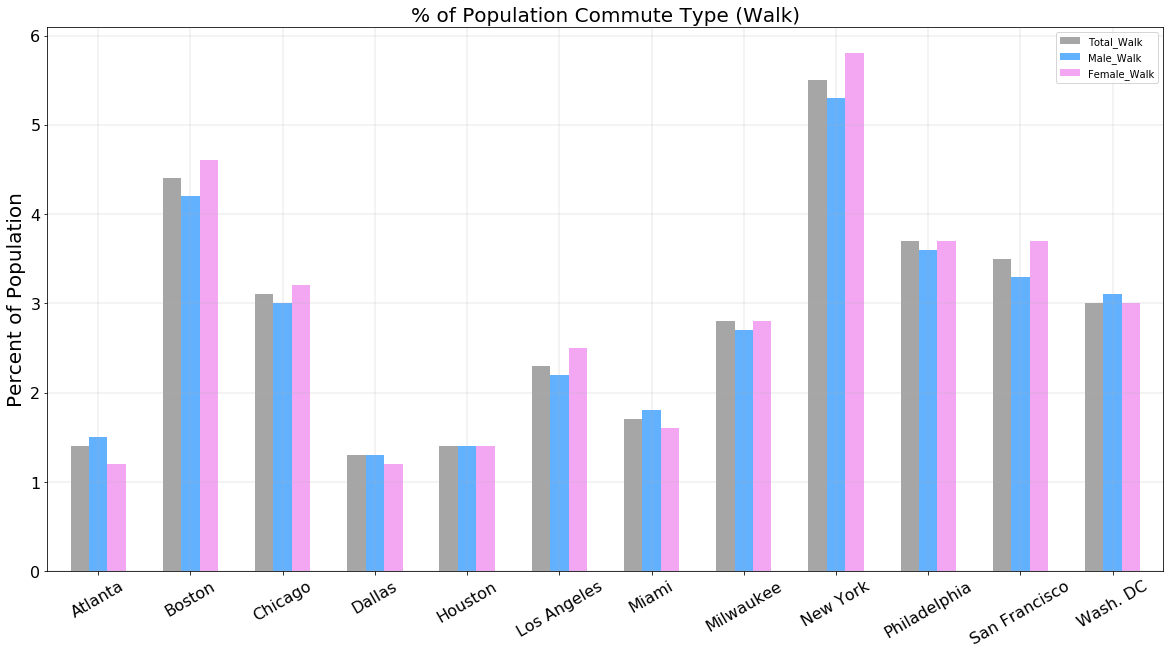

In [39]:
mode_walk.plot(x='CSA_Name', y=['Total_Walk', 'Male_Walk', 'Female_Walk'],
               kind='bar', figsize=(20,10), color=['grey', 'dodgerblue', 'violet'],
               fontsize=16, width=0.6, alpha=0.7)
plt.xlabel("")
plt.ylabel("Percent of Population", fontsize=20)
plt.title("% of Population Commute Type (Walk)", fontsize=20)
plt.grid(linewidth=0.3)
#plt.yticks(np.arange(50, 101, step=5))
plt.xticks(arange(12), ('Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles', 'Miami', 
                        'Milwaukee', 'New York', 'Philadelphia', 'San Francisco', 'Wash. DC'), 
                        fontsize='16', rotation=30)
plt.show()

# CSA Mode of Transport: Bicycle

In [40]:
variable = 'S0801_C01_011E'  
word = 'Bike'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_bike_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_bike_total.shape)
mode_bike_total = mode_bike_total[mode_bike_total['combined statistical area'].isin(csa)]
mode_bike_total = mode_bike_total.rename(columns={variable : 'Total_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_bike_total.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_bike_total.shape)
# mode_bike_total

(174, 4)
(12, 3)


In [41]:
variable = 'S0801_C02_011E' 
word = 'Bike'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_bike_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_bike_m.shape)
mode_bike_m = mode_bike_m[mode_bike_m['combined statistical area'].isin(csa)]
mode_bike_m = mode_bike_m.rename(columns={variable : 'Male_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_bike_m.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_bike_m.shape)
# mode_bike_m

(174, 4)
(12, 3)


In [42]:
variable = 'S0801_C03_011E'  
word = 'Bike'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_bike_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_bike_f.shape)
mode_bike_f = mode_bike_f[mode_bike_f['combined statistical area'].isin(csa)]
mode_bike_f = mode_bike_f.rename(columns={variable : 'Female_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_bike_f.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_bike_f.shape)
# mode_bike_f

(174, 4)
(12, 3)


In [43]:
mode_bike = pd.merge(mode_bike_total[['CSA_Name', 'CSA', 'Total_Bike']], mode_bike_m[['CSA', 'Male_Bike']])
mode_bike = mode_bike.merge(mode_bike_f[['CSA', 'Female_Bike']])
mode_bike['Diff'] = mode_bike['Male_Bike'] - mode_bike['Female_Bike']
print("Overall average", mode_bike['Total_Bike'].mean())
mode_bike.sort_values('Diff', ascending=False)

Overall average 0.6333333333333332


,CSA_Name,CSA,Total_Bike,Male_Bike,Female_Bike,Diff
10,"San Jose-San Francisco-Oakland, CA CSA",488,1.8,2.3,1.2,1.1
5,"Los Angeles-Long Beach, CA CSA",348,0.8,1.1,0.3,0.8
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,0.6,0.9,0.3,0.6
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,0.7,0.9,0.4,0.5
2,"Chicago-Naperville, IL-IN-WI CSA",176,0.7,0.9,0.4,0.5
8,"New York-Newark, NY-NJ-CT-PA CSA",408,0.6,0.8,0.3,0.5
11,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...",548,0.6,0.9,0.4,0.5
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,0.6,0.8,0.4,0.4
4,"Houston-The Woodlands, TX CSA",288,0.3,0.4,0.1,0.3
7,"Milwaukee-Racine-Waukesha, WI CSA",376,0.5,0.7,0.4,0.3


In [44]:
mode_bike2 = mode_bike.merge(pop_df[['CSA', 'Population']], on='CSA')
mode_bike2['Perct_total'] = mode_bike2['Total_Bike'] / 100
mode_bike2['Perct_male'] = mode_bike2['Male_Bike'] / 100
mode_bike2['Perct_female'] = mode_bike2['Female_Bike'] / 100
mode_bike2['Bike_Pop'] = mode_bike2['Perct_total'] * mode_bike2['Population']
mode_bike2['Bike_Pop_m'] = mode_bike2['Perct_male'] * mode_bike2['Population']
mode_bike2['Bike_Pop_f'] = mode_bike2['Perct_female'] * mode_bike2['Population']
mode_bike2['Pop_diff'] = mode_bike2['Bike_Pop_m'].astype(int) - mode_bike2['Bike_Pop_f'].astype(int)
mode_bike2.sort_values('Pop_diff', ascending=False)

,CSA_Name,CSA,Total_Bike,Male_Bike,Female_Bike,Diff,Population,Perct_total,Perct_male,Perct_female,Bike_Pop,Bike_Pop_m,Bike_Pop_f,Pop_diff
5,"Los Angeles-Long Beach, CA CSA",348,0.8,1.1,0.3,0.8,18463122,0.008,0.011,0.003,147704.976,203094.342,55389.366,147705
8,"New York-Newark, NY-NJ-CT-PA CSA",408,0.6,0.8,0.3,0.5,23568545,0.006,0.008,0.003,141411.270,188548.360,70705.635,117843
10,"San Jose-San Francisco-Oakland, CA CSA",488,1.8,2.3,1.2,1.1,8574623,0.018,0.023,0.012,154343.214,197216.329,102895.476,94321
2,"Chicago-Naperville, IL-IN-WI CSA",176,0.7,0.9,0.4,0.5,9902385,0.007,0.009,0.004,69316.695,89121.465,39609.540,49512
11,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...",548,0.6,0.9,0.4,0.5,9518995,0.006,0.009,0.004,57113.970,85670.955,38075.980,47595
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,0.7,0.9,0.4,0.5,8096628,0.007,0.009,0.004,56676.396,72869.652,32386.512,40483
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,0.6,0.9,0.3,0.6,6558445,0.006,0.009,0.003,39350.670,59026.005,19675.335,39351
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,0.6,0.8,0.4,0.4,7158466,0.006,0.008,0.004,42950.796,57267.728,28633.864,28634
4,"Houston-The Woodlands, TX CSA",288,0.3,0.4,0.1,0.3,6679518,0.003,0.004,0.001,20038.554,26718.072,6679.518,20039
3,"Dallas-Fort Worth, TX-OK CSA",206,0.2,0.3,0.1,0.2,7389674,0.002,0.003,0.001,14779.348,22169.022,7389.674,14780


/Users/rspd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


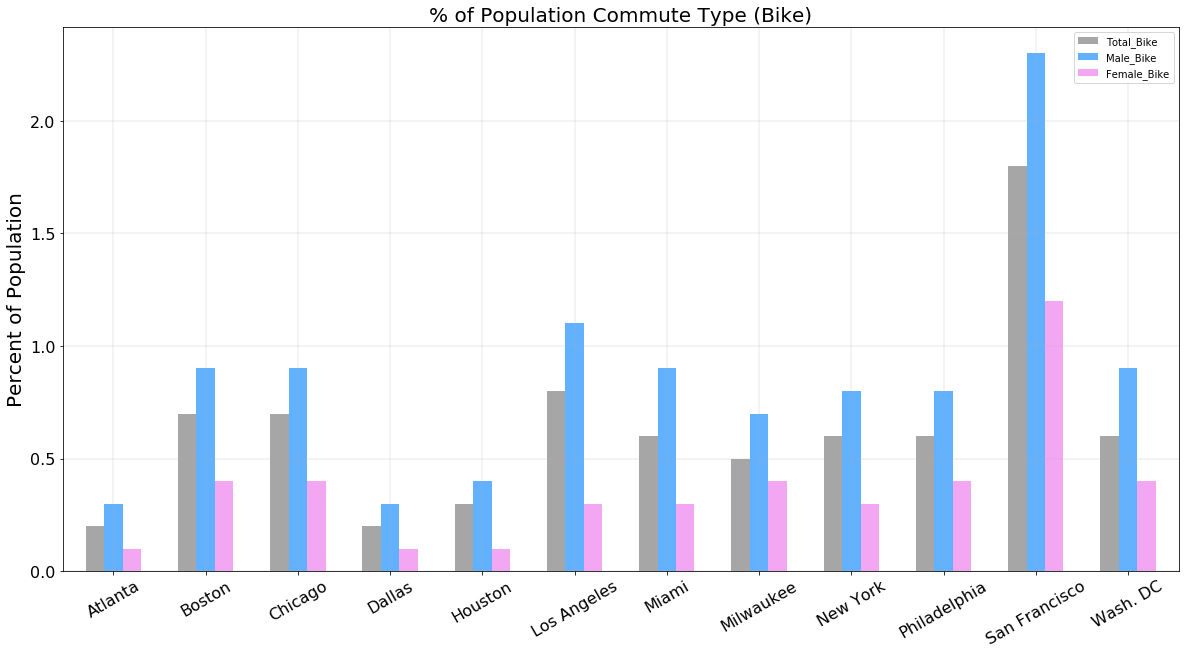

In [45]:
mode_bike.plot(x='CSA_Name', y=['Total_Bike', 'Male_Bike', 'Female_Bike'],
               kind='bar', figsize=(20,10), color=['grey', 'dodgerblue', 'violet'],
               fontsize=16, width=0.6, alpha=0.7)
plt.xlabel("")
plt.ylabel("Percent of Population", fontsize=20)
plt.title("% of Population Commute Type (Bike)", fontsize=20)
plt.grid(linewidth=0.3)
#plt.yticks(np.arange(50, 101, step=5))
plt.xticks(arange(12), ('Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles', 'Miami', 
                        'Milwaukee', 'New York', 'Philadelphia', 'San Francisco', 'Wash. DC'), 
                        fontsize='16', rotation=30)
plt.show()

# CSA Mode of Transport: Taxi, Motorcycle, Other

In [46]:
variable = 'S0801_C01_012E'  
word = 'Other'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_various_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_various_total.shape)
mode_various_total = mode_various_total[mode_various_total['combined statistical area'].isin(csa)]
mode_various_total = mode_various_total.rename(columns={variable : 'Total_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_various_total.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_various_total.shape)
# mode_various_total

(174, 4)
(12, 3)


In [47]:
variable = 'S0801_C02_012E'  
word = 'Other'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_various_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_various_m.shape)
mode_various_m = mode_various_m[mode_various_m['combined statistical area'].isin(csa)]
mode_various_m = mode_various_m.rename(columns={variable : 'Male_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_various_m.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_various_m.shape)
# mode_various_m

(174, 4)
(12, 3)


In [48]:
variable = 'S0801_C03_012E'  
word = 'Other'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_various_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_various_f.shape)
mode_various_f = mode_various_f[mode_various_f['combined statistical area'].isin(csa)]
mode_various_f = mode_various_f.rename(columns={variable : 'Female_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_various_f.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_various_f.shape)
# mode_various_f

(174, 4)
(12, 3)


In [49]:
mode_various = pd.merge(mode_various_total[['CSA_Name', 'CSA', 'Total_Other']], mode_various_m[['CSA', 'Male_Other']])
mode_various = mode_various.merge(mode_various_f[['CSA', 'Female_Other']])
mode_various

,CSA_Name,CSA,Total_Other,Male_Other,Female_Other
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,1.4,1.6,1.1
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,1.1,1.2,1.0
2,"Chicago-Naperville, IL-IN-WI CSA",176,1.1,1.2,1.0
3,"Dallas-Fort Worth, TX-OK CSA",206,1.4,1.7,1.0
4,"Houston-The Woodlands, TX CSA",288,1.4,1.7,1.2
5,"Los Angeles-Long Beach, CA CSA",348,1.3,1.5,1.0
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,1.4,1.7,1.0
7,"Milwaukee-Racine-Waukesha, WI CSA",376,0.8,1.0,0.6
8,"New York-Newark, NY-NJ-CT-PA CSA",408,1.4,1.5,1.3
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,1.0,1.1,0.8


/Users/rspd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


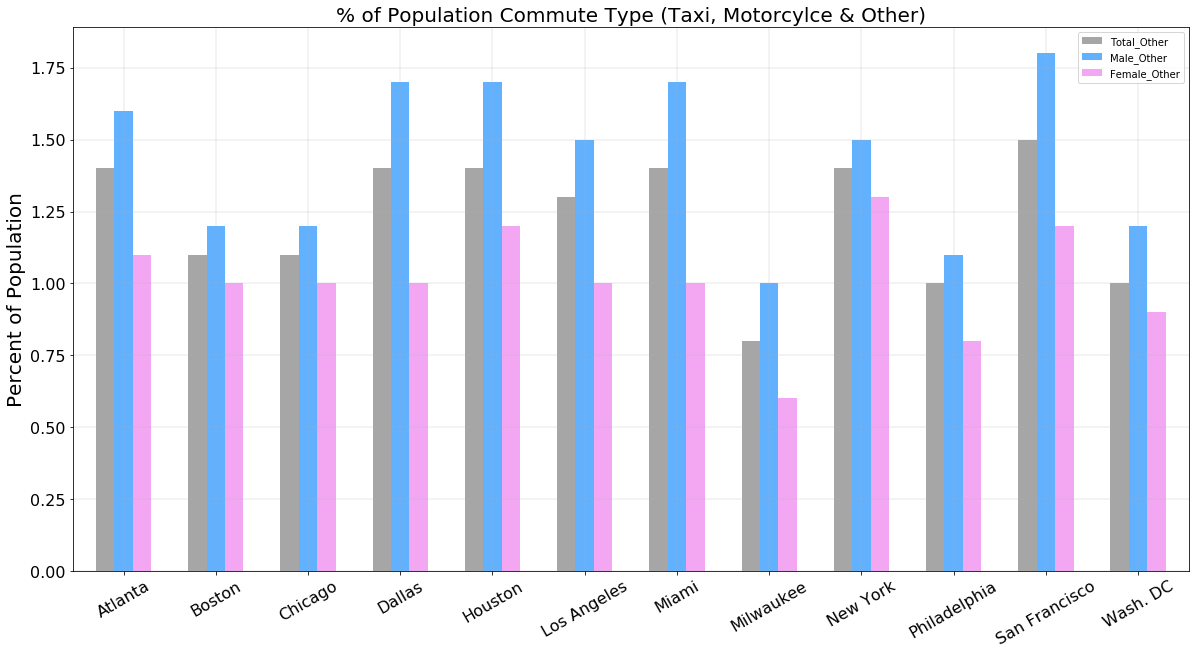

In [50]:
mode_various.plot(x='CSA_Name', y=['Total_Other', 'Male_Other', 'Female_Other'],
                  kind='bar', figsize=(20,10), color=['grey', 'dodgerblue', 'violet'],
                  fontsize=16, width=0.6, alpha=0.7)
plt.xlabel("")
plt.ylabel("Percent of Population", fontsize=20)
plt.title("% of Population Commute Type (Taxi, Motorcylce & Other)", fontsize=20)
plt.grid(linewidth=0.3)
#plt.yticks(np.arange(50, 101, step=5))
plt.xticks(arange(12), ('Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles', 'Miami', 
                        'Milwaukee', 'New York', 'Philadelphia', 'San Francisco', 'Wash. DC'), 
                        fontsize='16', rotation=30)
plt.show()

# CSA Mode of Transport: Worked from Home

In [51]:
variable = 'S0801_C01_013E'  
word = 'Home'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_home_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_home_total.shape)
mode_home_total = mode_home_total[mode_home_total['combined statistical area'].isin(csa)]
mode_home_total = mode_home_total.rename(columns={variable : 'Total_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_home_total.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_home_total.shape)
# mode_home_total

(174, 4)
(12, 3)


In [52]:
variable = 'S0801_C02_013E'  
word = 'Home'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_home_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_home_m.shape)
mode_home_m = mode_home_m[mode_home_m['combined statistical area'].isin(csa)]
mode_home_m = mode_home_m.rename(columns={variable : 'Male_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_home_m.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_home_m.shape)
# mode_home_m

(174, 4)
(12, 3)


In [53]:
variable = 'S0801_C03_013E'  
word = 'Home'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
mode_home_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(mode_home_f.shape)
mode_home_f = mode_home_f[mode_home_f['combined statistical area'].isin(csa)]
mode_home_f = mode_home_f.rename(columns={variable : 'Female_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
mode_home_f.drop('Unnamed: 3', axis=1, inplace=True)
print(mode_home_f.shape)
# mode_home_f

(174, 4)
(12, 3)


In [54]:
mode_home = pd.merge(mode_home_total[['CSA_Name', 'CSA', 'Total_Home']], mode_home_m[['CSA', 'Male_Home']])
mode_home = mode_home.merge(mode_home_f[['CSA', 'Female_Home']])
mode_home['Diff'] = mode_home['Female_Home'] - mode_home['Male_Home']
mode_home.sort_values('Diff', ascending=False)

,CSA_Name,CSA,Total_Home,Male_Home,Female_Home,Diff
5,"Los Angeles-Long Beach, CA CSA",348,5.2,4.6,5.9,1.3
10,"San Jose-San Francisco-Oakland, CA CSA",488,5.6,5.1,6.3,1.2
4,"Houston-The Woodlands, TX CSA",288,3.7,3.3,4.2,0.9
11,"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA...",548,4.9,4.5,5.3,0.8
7,"Milwaukee-Racine-Waukesha, WI CSA",376,3.6,3.3,3.9,0.6
3,"Dallas-Fort Worth, TX-OK CSA",206,5.0,4.7,5.3,0.6
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,6.0,5.8,6.2,0.4
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,4.7,4.6,4.8,0.2
8,"New York-Newark, NY-NJ-CT-PA CSA",408,4.3,4.2,4.4,0.2
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,4.2,4.1,4.3,0.2


/Users/rspd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


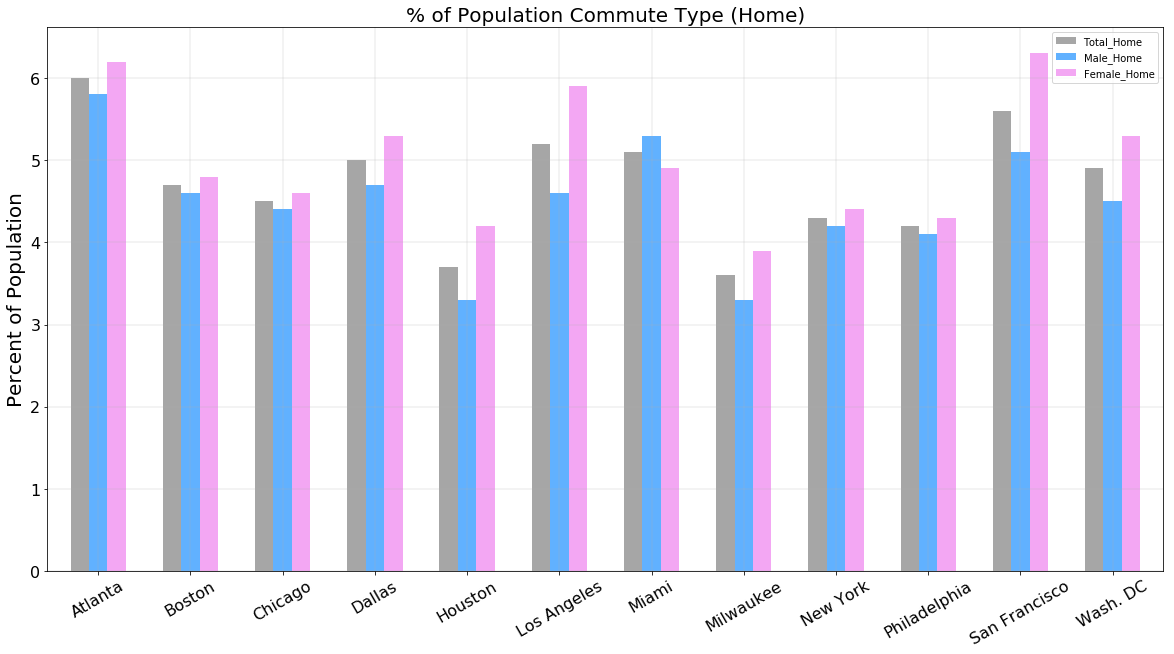

In [55]:
mode_home.plot(x='CSA_Name', y=['Total_Home', 'Male_Home', 'Female_Home'],
               kind='bar', figsize=(20,10), color=['grey', 'dodgerblue', 'violet'],
               fontsize=16, width=0.6, alpha=0.7)
plt.xlabel("")
plt.ylabel("Percent of Population", fontsize=20)
plt.title("% of Population Commute Type (Home)", fontsize=20)
plt.grid(linewidth=0.3)
#plt.yticks(np.arange(50, 101, step=5))
plt.xticks(arange(12), ('Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles', 'Miami', 
                        'Milwaukee', 'New York', 'Philadelphia', 'San Francisco', 'Wash. DC'), 
                        fontsize='16', rotation=30)
plt.show()

### Combining all into one 

In [56]:
csa_allmodes = pd.concat([mode_car, mode_public.iloc[:, 2:], mode_walk.iloc[:, 2:], mode_bike.iloc[:, 2:], 
                          mode_various.iloc[:, 2:], mode_home.iloc[:,2:]], axis=1)
csa_allmodes
#csa_allmodes.to_csv("csa_allmodes.csv")

,CSA_Name,CSA,Total_Car,Male_Car,Female_Car,Diff,Total_PubTran,Male_PubTran,Female_PubTran,Diff,...,Male_Bike,Female_Bike,Diff,Total_Other,Male_Other,Female_Other,Total_Home,Male_Home,Female_Home,Diff
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,88.2,88.1,88.4,-0.3,2.8,2.7,3.0,0.3,...,0.3,0.1,0.2,1.4,1.6,1.1,6.0,5.8,6.2,0.4
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,80.7,80.9,80.5,0.4,8.5,8.2,8.8,0.6,...,0.9,0.4,0.5,1.1,1.2,1.0,4.7,4.6,4.8,0.2
2,"Chicago-Naperville, IL-IN-WI CSA",176,79.2,79.7,78.6,1.1,11.4,10.7,12.2,1.5,...,0.9,0.4,0.5,1.1,1.2,1.0,4.5,4.4,4.6,0.2
3,"Dallas-Fort Worth, TX-OK CSA",206,90.7,90.6,90.9,-0.3,1.4,1.4,1.5,0.1,...,0.3,0.1,0.2,1.4,1.7,1.0,5.0,4.7,5.3,0.6
4,"Houston-The Woodlands, TX CSA",288,91.0,91.3,90.6,0.7,2.2,2.0,2.5,0.5,...,0.4,0.1,0.3,1.4,1.7,1.2,3.7,3.3,4.2,0.9
5,"Los Angeles-Long Beach, CA CSA",348,86.0,86.5,85.3,1.2,4.4,4.1,4.9,0.8,...,1.1,0.3,0.8,1.3,1.5,1.0,5.2,4.6,5.9,1.3
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,87.5,87.1,88.1,-1.0,3.6,3.2,4.0,0.8,...,0.9,0.3,0.6,1.4,1.7,1.0,5.1,5.3,4.9,-0.4
7,"Milwaukee-Racine-Waukesha, WI CSA",376,89.3,89.4,89.1,0.3,3.0,2.8,3.2,0.4,...,0.7,0.4,0.3,0.8,1.0,0.6,3.6,3.3,3.9,0.6
8,"New York-Newark, NY-NJ-CT-PA CSA",408,61.1,62.2,59.9,2.3,27.1,26.0,28.3,2.3,...,0.8,0.3,0.5,1.4,1.5,1.3,4.3,4.2,4.4,0.2
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,82.0,82.8,81.2,1.6,8.6,7.6,9.6,2.0,...,0.8,0.4,0.4,1.0,1.1,0.8,4.2,4.1,4.3,0.2


In [57]:
csa_allmodes['Total_Car'].mean()

82.68333333333332

In [58]:
allmodes_f = csa_allmodes[['CSA_Name','Female_Car','Female_PubTran', 'Female_Home', 'Female_Walk',
                           'Female_Other', 'Female_Bike']]
allmodes_m = csa_allmodes[['CSA_Name','Male_Car','Male_PubTran', 'Male_Home', 'Male_Walk',
                           'Male_Other', 'Male_Bike']]
allmodes_m.head()

,CSA_Name,Male_Car,Male_PubTran,Male_Home,Male_Walk,Male_Other,Male_Bike
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",88.1,2.7,5.8,1.5,1.6,0.3
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",80.9,8.2,4.6,4.2,1.2,0.9
2,"Chicago-Naperville, IL-IN-WI CSA",79.7,10.7,4.4,3.0,1.2,0.9
3,"Dallas-Fort Worth, TX-OK CSA",90.6,1.4,4.7,1.3,1.7,0.3
4,"Houston-The Woodlands, TX CSA",91.3,2.0,3.3,1.4,1.7,0.4


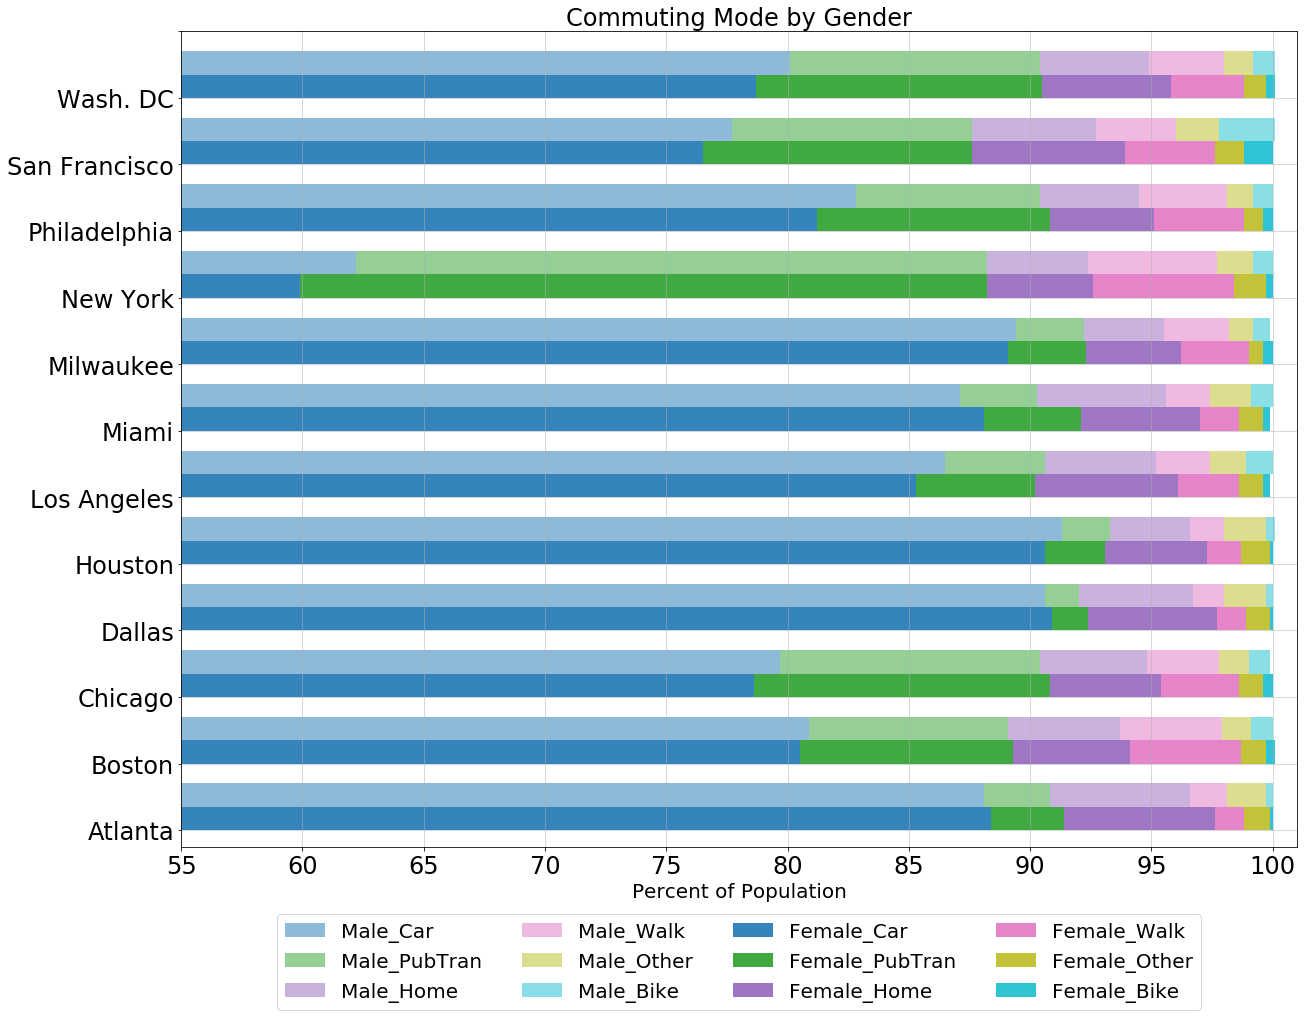

In [59]:
fig, ax = plt.subplots()
width=0.4
allmodes_m.plot.barh(stacked=True, figsize=(20,15), position=-1, ax=ax, width=0.35, 
                     cmap='tab10', alpha=0.5, xlim=(50,101), align='center')
allmodes_f.plot.barh(stacked=True, ax=ax, width=0.35, position=0, cmap='tab10', 
                     xlim=(55,101), alpha=0.9, align='center')
plt.xticks(np.arange(55, 101, step=5), fontsize='16')
plt.yticks(arange(13), ('Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles', 'Miami', 
                        'Milwaukee', 'New York', 'Philadelphia', 'San Francisco', 'Wash. DC'), 
                        fontsize='24')
plt.xticks(fontsize=24)
plt.title("Commuting Mode by Gender", fontsize=24)
plt.xlabel("Percent of Population", fontsize=20)
plt.grid(linewidth=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=4, prop={'size': 20})
plt.show()

# Commuting Duration

** Commuting 10 minutes or less **

In [60]:
variable = 'S0801_C01_037E'  
word = 'Time_<10m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_10_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_10_total.shape)
time_10_total = time_10_total[time_10_total['combined statistical area'].isin(csa)]
time_10_total = time_10_total.rename(columns={variable : 'Total_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_10_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_10_total.shape)
# time_10_total

(174, 4)
(12, 3)


In [61]:
variable = 'S0801_C02_037E'  
word = 'Time_<10m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_10_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_10_m.shape)
time_10_m = time_10_m[time_10_m['combined statistical area'].isin(csa)]
time_10_m = time_10_m.rename(columns={variable : 'Male_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_10_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_10_m.shape)
# time_10_m

(174, 4)
(12, 3)


In [62]:
variable = 'S0801_C03_037E'  
word = 'Time_<10m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_10_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_10_f.shape)
time_10_f = time_10_f[time_10_f['combined statistical area'].isin(csa)]
time_10_f = time_10_f.rename(columns={variable : 'Female_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_10_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_10_f.shape)
# time_10_f

(174, 4)
(12, 3)


In [63]:
time_10 = pd.merge(time_10_total[['CSA_Name', 'CSA', 'Total_Time_<10m']], time_10_m[['CSA', 'Male_Time_<10m']])
time_10 = time_10.merge(time_10_f[['CSA', 'Female_Time_<10m']])
time_10

,CSA_Name,CSA,Total_Time_<10m,Male_Time_<10m,Female_Time_<10m
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,8.1,7.5,8.8
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,10.9,9.9,12.0
2,"Chicago-Naperville, IL-IN-WI CSA",176,9.2,8.1,10.4
3,"Dallas-Fort Worth, TX-OK CSA",206,9.9,9.0,11.0
4,"Houston-The Woodlands, TX CSA",288,8.6,7.4,10.1
5,"Los Angeles-Long Beach, CA CSA",348,8.3,7.4,9.5
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,7.4,6.8,8.1
7,"Milwaukee-Racine-Waukesha, WI CSA",376,14.1,13.0,15.3
8,"New York-Newark, NY-NJ-CT-PA CSA",408,8.1,7.5,8.8
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,10.5,9.9,11.2


/Users/rspd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


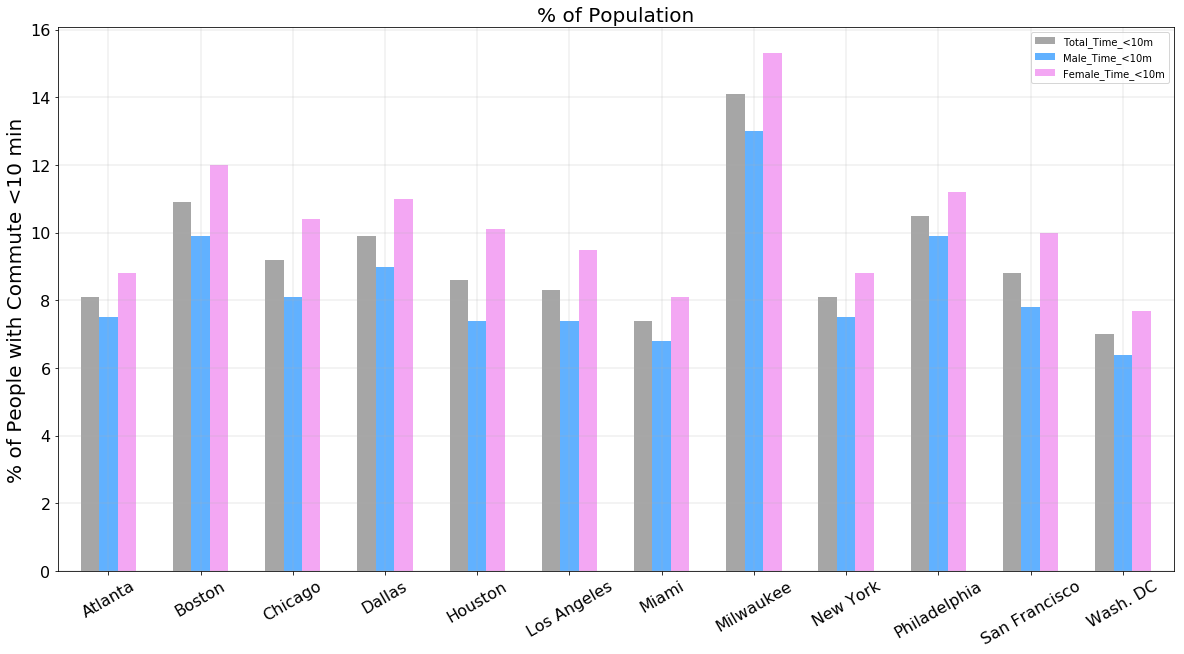

In [64]:
time_10.plot(x='CSA_Name', y=['Total_Time_<10m', 'Male_Time_<10m', 'Female_Time_<10m'],
             kind='bar', figsize=(20,10), color=['grey', 'dodgerblue', 'violet'],
             fontsize=16, width=0.6, alpha=0.7)
plt.xlabel("")
plt.ylabel("% of People with Commute <10 min", fontsize=20)
plt.title("% of Population", fontsize=20)
plt.grid(linewidth=0.3)
#plt.yticks(np.arange(50, 101, step=5))
plt.xticks(arange(12), ('Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles', 'Miami', 
                        'Milwaukee', 'New York', 'Philadelphia', 'San Francisco', 'Wash. DC'), 
                        fontsize='16', rotation=30)
plt.show()

** Commuting 10-14 minutes **

In [65]:
variable = 'S0801_C01_038E'  
word = 'Time_14m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_14_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_14_total.shape)
time_14_total = time_14_total[time_14_total['combined statistical area'].isin(csa)]
time_14_total = time_14_total.rename(columns={variable : 'Total_' + word, 
                                              'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_14_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_14_total.shape)
# time_14_total

(174, 4)
(12, 3)


In [66]:
variable = 'S0801_C02_038E'  
word = 'Time_14m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_14_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_14_m.shape)
time_14_m = time_14_m[time_14_m['combined statistical area'].isin(csa)]
time_14_m = time_14_m.rename(columns={variable : 'Male_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_14_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_14_m.shape)
# time_14_m

(174, 4)
(12, 3)


In [67]:
variable = 'S0801_C03_038E'  
word = 'Time_14m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_14_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_14_f.shape)
time_14_f = time_14_f[time_14_f['combined statistical area'].isin(csa)]
time_14_f = time_14_f.rename(columns={variable : 'Female_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_14_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_14_f.shape)
# time_14_f

(174, 4)
(12, 3)


In [68]:
time_14 = pd.merge(time_14_total[['CSA_Name', 'CSA', 'Total_Time_14m']], time_14_m[['CSA', 'Male_Time_14m']])
time_14 = time_14.merge(time_14_f[['CSA', 'Female_Time_14m']])
time_14

,CSA_Name,CSA,Total_Time_14m,Male_Time_14m,Female_Time_14m
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,10.9,10.0,11.9
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,12.4,11.3,13.6
2,"Chicago-Naperville, IL-IN-WI CSA",176,10.6,9.6,11.7
3,"Dallas-Fort Worth, TX-OK CSA",206,12.0,11.0,13.2
4,"Houston-The Woodlands, TX CSA",288,10.9,9.9,12.1
5,"Los Angeles-Long Beach, CA CSA",348,11.7,10.8,12.9
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,10.9,10.3,11.7
7,"Milwaukee-Racine-Waukesha, WI CSA",376,14.6,13.5,15.8
8,"New York-Newark, NY-NJ-CT-PA CSA",408,9.9,9.1,10.8
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,12.3,11.6,13.2


**Commuting 15 - 19 minutes**

In [69]:
variable = 'S0801_C01_039E'  
word = 'Time_19m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_19_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_19_total.shape)
time_19_total = time_19_total[time_19_total['combined statistical area'].isin(csa)]
time_19_total = time_19_total.rename(columns={variable : 'Total_' + word, 
                                              'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_19_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_19_total.shape)
# time_19_total

(174, 4)
(12, 3)


In [70]:
variable = 'S0801_C02_039E'  
word = 'Time_19m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_19_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_19_m.shape)
time_19_m = time_19_m[time_19_m['combined statistical area'].isin(csa)]
time_19_m = time_19_m.rename(columns={variable : 'Male_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_19_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_19_m.shape)
# time_19_m

(174, 4)
(12, 3)


In [71]:
variable = 'S0801_C03_039E'  
word = 'Time_19m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_19_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_19_f.shape)
time_19_f = time_19_f[time_19_f['combined statistical area'].isin(csa)]
time_19_f = time_19_f.rename(columns={variable : 'Female_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_19_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_19_f.shape)
# time_19_f

(174, 4)
(12, 3)


In [72]:
time_19 = pd.merge(time_19_total[['CSA_Name', 'CSA', 'Total_Time_19m']], time_19_m[['CSA', 'Male_Time_19m']])
time_19 = time_19.merge(time_19_f[['CSA', 'Female_Time_19m']])
time_19

,CSA_Name,CSA,Total_Time_19m,Male_Time_19m,Female_Time_19m
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,13.3,12.6,14.2
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,13.5,12.6,14.4
2,"Chicago-Naperville, IL-IN-WI CSA",176,11.8,11.1,12.7
3,"Dallas-Fort Worth, TX-OK CSA",206,14.2,13.3,15.3
4,"Houston-The Woodlands, TX CSA",288,13.4,12.3,14.9
5,"Los Angeles-Long Beach, CA CSA",348,14.2,13.5,15.0
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,13.9,13.4,14.5
7,"Milwaukee-Racine-Waukesha, WI CSA",376,16.3,15.7,17.0
8,"New York-Newark, NY-NJ-CT-PA CSA",408,11.0,10.3,11.9
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,13.7,12.8,14.6


**Commuting 20 - 24 minutes**

In [73]:
variable = 'S0801_C01_040E'  
word = 'Time_24m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_24_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_24_total.shape)
time_24_total = time_24_total[time_24_total['combined statistical area'].isin(csa)]
time_24_total = time_24_total.rename(columns={variable : 'Total_' + word, 
                                              'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_24_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_24_total.shape)
# time_24_total

(174, 4)
(12, 3)


In [74]:
variable = 'S0801_C02_040E'  
word = 'Time_24m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_24_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_24_m.shape)
time_24_m = time_24_m[time_24_m['combined statistical area'].isin(csa)]
time_24_m = time_24_m.rename(columns={variable : 'Male_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_24_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_24_m.shape)
# time_24_m

(174, 4)
(12, 3)


In [75]:
variable = 'S0801_C03_040E'  
word = 'Time_24m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_24_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_24_f.shape)
time_24_f = time_24_f[time_24_f['combined statistical area'].isin(csa)]
time_24_f = time_24_f.rename(columns={variable : 'Female_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_24_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_24_f.shape)
# time_24_f

(174, 4)
(12, 3)


In [76]:
time_24 = pd.merge(time_24_total[['CSA_Name', 'CSA', 'Total_Time_24m']], time_24_m[['CSA', 'Male_Time_24m']])
time_24 = time_24.merge(time_24_f[['CSA', 'Female_Time_24m']])
time_24

,CSA_Name,CSA,Total_Time_24m,Male_Time_24m,Female_Time_24m
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,14.2,13.7,14.8
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,13.3,12.8,13.8
2,"Chicago-Naperville, IL-IN-WI CSA",176,12.5,12.1,13.0
3,"Dallas-Fort Worth, TX-OK CSA",206,14.4,14.1,14.7
4,"Houston-The Woodlands, TX CSA",288,13.8,13.3,14.4
5,"Los Angeles-Long Beach, CA CSA",348,14.3,14.1,14.6
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,15.9,15.6,16.3
7,"Milwaukee-Racine-Waukesha, WI CSA",376,16.4,16.3,16.5
8,"New York-Newark, NY-NJ-CT-PA CSA",408,11.9,11.5,12.3
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,14.1,13.7,14.6


**Commuting 25-29 minutes**

In [77]:
variable = 'S0801_C01_041E'  
word = 'Time_29m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_29_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_29_total.shape)
time_29_total = time_29_total[time_29_total['combined statistical area'].isin(csa)]
time_29_total = time_29_total.rename(columns={variable : 'Total_' + word, 
                                              'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_29_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_29_total.shape)
# time_29_total

(174, 4)
(12, 3)


In [78]:
variable = 'S0801_C02_041E'  
word = 'Time_29m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_29_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_29_m.shape)
time_29_m = time_29_m[time_29_m['combined statistical area'].isin(csa)]
time_29_m = time_29_m.rename(columns={variable : 'Male_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_29_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_29_m.shape)
# time_29_m

(174, 4)
(12, 3)


In [79]:
variable = 'S0801_C03_041E'  
word = 'Time_29m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_29_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_29_f.shape)
time_29_f = time_29_f[time_29_f['combined statistical area'].isin(csa)]
time_29_f = time_29_f.rename(columns={variable : 'Female_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_29_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_29_f.shape)
# time_29_f

(174, 4)
(12, 3)


In [80]:
time_29 = pd.merge(time_29_total[['CSA_Name', 'CSA', 'Total_Time_29m']], time_29_m[['CSA', 'Male_Time_29m']])
time_29 = time_29.merge(time_29_f[['CSA', 'Female_Time_29m']])
time_29

,CSA_Name,CSA,Total_Time_29m,Male_Time_29m,Female_Time_29m
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,6.0,6.0,6.1
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,6.1,6.1,6.0
2,"Chicago-Naperville, IL-IN-WI CSA",176,6.0,6.0,6.1
3,"Dallas-Fort Worth, TX-OK CSA",206,6.5,6.4,6.5
4,"Houston-The Woodlands, TX CSA",288,5.7,5.7,5.9
5,"Los Angeles-Long Beach, CA CSA",348,5.7,5.6,5.8
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,6.6,6.7,6.5
7,"Milwaukee-Racine-Waukesha, WI CSA",376,7.7,7.9,7.6
8,"New York-Newark, NY-NJ-CT-PA CSA",408,5.2,5.0,5.3
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,6.5,6.5,6.5


**Commuting 30-34 minutes**

In [81]:
variable = 'S0801_C01_042E'  
word = 'Time_34m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_34_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_34_total.shape)
time_34_total = time_34_total[time_34_total['combined statistical area'].isin(csa)]
time_34_total = time_34_total.rename(columns={variable : 'Total_' + word, 
                                              'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_34_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_34_total.shape)
# time_34_total

(174, 4)
(12, 3)


In [82]:
variable = 'S0801_C02_042E'  
word = 'Time_34m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_34_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_34_m.shape)
time_34_m = time_34_m[time_34_m['combined statistical area'].isin(csa)]
time_34_m = time_34_m.rename(columns={variable : 'Male_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_34_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_34_m.shape)
# time_34_m

(174, 4)
(12, 3)


In [83]:
variable = 'S0801_C03_042E'  
word = 'Time_34m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_34_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_34_f.shape)
time_34_f = time_34_f[time_34_f['combined statistical area'].isin(csa)]
time_34_f = time_34_f.rename(columns={variable : 'Female_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_34_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_34_f.shape)
# time_34_f

(174, 4)
(12, 3)


In [84]:
time_34 = pd.merge(time_34_total[['CSA_Name', 'CSA', 'Total_Time_34m']], time_34_m[['CSA', 'Male_Time_34m']])
time_34 = time_34.merge(time_34_f[['CSA', 'Female_Time_34m']])
time_34

,CSA_Name,CSA,Total_Time_34m,Male_Time_34m,Female_Time_34m
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,15.4,16.1,14.7
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,13.9,14.2,13.6
2,"Chicago-Naperville, IL-IN-WI CSA",176,15.2,15.7,14.5
3,"Dallas-Fort Worth, TX-OK CSA",206,16.6,17.4,15.7
4,"Houston-The Woodlands, TX CSA",288,17.6,18.4,16.5
5,"Los Angeles-Long Beach, CA CSA",348,16.4,16.9,15.7
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,18.8,19.3,18.2
7,"Milwaukee-Racine-Waukesha, WI CSA",376,13.1,13.8,12.5
8,"New York-Newark, NY-NJ-CT-PA CSA",408,14.4,14.5,14.3
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,14.2,14.3,14.1


**Commuting 35-44 minutes**

In [85]:
variable = 'S0801_C01_043E'  
word = 'Time_44m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_44_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_44_total.shape)
time_44_total = time_44_total[time_44_total['combined statistical area'].isin(csa)]
time_44_total = time_44_total.rename(columns={variable : 'Total_' + word, 
                                              'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_44_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_44_total.shape)
# time_44_total

(174, 4)
(12, 3)


In [86]:
variable = 'S0801_C02_043E'  
word = 'Time_44m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_44_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_44_m.shape)
time_44_m = time_44_m[time_44_m['combined statistical area'].isin(csa)]
time_44_m = time_44_m.rename(columns={variable : 'Male_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_44_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_44_m.shape)
# time_44_m

(174, 4)
(12, 3)


In [87]:
variable = 'S0801_C03_043E'  
word = 'Time_44m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_44_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_44_f.shape)
time_44_f = time_44_f[time_44_f['combined statistical area'].isin(csa)]
time_44_f = time_44_f.rename(columns={variable : 'Female_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_44_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_44_f.shape)
# time_44_f

(174, 4)
(12, 3)


In [88]:
time_44 = pd.merge(time_44_total[['CSA_Name', 'CSA', 'Total_Time_44m']], time_44_m[['CSA', 'Male_Time_44m']])
time_44 = time_44.merge(time_44_f[['CSA', 'Female_Time_44m']])
time_44

,CSA_Name,CSA,Total_Time_44m,Male_Time_44m,Female_Time_44m
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,8.3,8.6,8.0
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,8.1,8.6,7.6
2,"Chicago-Naperville, IL-IN-WI CSA",176,9.3,9.8,8.7
3,"Dallas-Fort Worth, TX-OK CSA",206,7.8,8.3,7.3
4,"Houston-The Woodlands, TX CSA",288,8.0,8.6,7.2
5,"Los Angeles-Long Beach, CA CSA",348,7.2,7.5,6.8
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,7.9,8.2,7.5
7,"Milwaukee-Racine-Waukesha, WI CSA",376,6.8,7.5,6.0
8,"New York-Newark, NY-NJ-CT-PA CSA",408,8.4,8.6,8.2
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,8.1,8.4,7.8


**Commuting 45 - 59 minutes**

In [89]:
variable = 'S0801_C01_044E'  
word = 'Time_59m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_59_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_59_total.shape)
time_59_total = time_59_total[time_59_total['combined statistical area'].isin(csa)]
time_59_total = time_59_total.rename(columns={variable : 'Total_' + word, 
                                              'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_59_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_59_total.shape)
# time_59_total

(174, 4)
(12, 3)


In [90]:
variable = 'S0801_C02_044E'  
word = 'Time_59m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_59_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_59_m.shape)
time_59_m = time_59_m[time_59_m['combined statistical area'].isin(csa)]
time_59_m = time_59_m.rename(columns={variable : 'Male_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_59_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_59_m.shape)
# time_59_m

(174, 4)
(12, 3)


In [91]:
variable = 'S0801_C03_044E'  
word = 'Time_59m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_59_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_59_f.shape)
time_59_f = time_59_f[time_59_f['combined statistical area'].isin(csa)]
time_59_f = time_59_f.rename(columns={variable : 'Female_' + word, 
                                      'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_59_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_59_f.shape)
# time_59_f

(174, 4)
(12, 3)


In [92]:
time_59 = pd.merge(time_59_total[['CSA_Name', 'CSA', 'Total_Time_59m']], time_59_m[['CSA', 'Male_Time_59m']])
time_59 = time_59.merge(time_59_f[['CSA', 'Female_Time_59m']])
time_59

,CSA_Name,CSA,Total_Time_59m,Male_Time_59m,Female_Time_59m
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,11.5,12.0,11.0
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,10.1,11.0,9.1
2,"Chicago-Naperville, IL-IN-WI CSA",176,11.9,12.8,10.9
3,"Dallas-Fort Worth, TX-OK CSA",206,10.1,10.6,9.6
4,"Houston-The Woodlands, TX CSA",288,11.2,12.1,10.1
5,"Los Angeles-Long Beach, CA CSA",348,9.3,9.8,8.7
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,9.5,9.8,9.1
7,"Milwaukee-Racine-Waukesha, WI CSA",376,6.2,7.0,5.3
8,"New York-Newark, NY-NJ-CT-PA CSA",408,11.6,12.1,11.0
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,10.1,10.7,9.4


** Commuting 60 min + **

In [93]:
variable = 'S0801_C01_045E'  
word = 'Time_>60m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_60_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_60_total.shape)
time_60_total = time_60_total[time_60_total['combined statistical area'].isin(csa)]
time_60_total = time_60_total.rename(columns={variable : 'Total_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_60_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_60_total.shape)
# time_60_total

(174, 4)
(12, 3)


In [94]:
variable = 'S0801_C02_045E' 
word = 'Time_>60m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_60_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_60_m.shape)
time_60_m = time_60_m[time_60_m['combined statistical area'].isin(csa)]
time_60_m = time_60_m.rename(columns={variable : 'Male_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_60_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_60_m.shape)
# time_60_m

(174, 4)
(12, 3)


In [95]:
variable = 'S0801_C03_045E'  
word = 'Time_>60m'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_60_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_60_f.shape)
time_60_f = time_60_f[time_60_f['combined statistical area'].isin(csa)]
time_60_f = time_60_f.rename(columns={variable : 'Female_' + word, 'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_60_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_60_f.shape)
# time_60_f

(174, 4)
(12, 3)


In [96]:
time_60 = pd.merge(time_60_total[['CSA_Name', 'CSA', 'Total_Time_>60m']], time_60_m[['CSA', 'Male_Time_>60m']])
time_60 = time_60.merge(time_60_f[['CSA', 'Female_Time_>60m']])
time_60

,CSA_Name,CSA,Total_Time_>60m,Male_Time_>60m,Female_Time_>60m
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,12.2,13.6,10.6
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,11.8,13.6,9.9
2,"Chicago-Naperville, IL-IN-WI CSA",176,13.5,14.8,12.0
3,"Dallas-Fort Worth, TX-OK CSA",206,8.5,9.9,6.9
4,"Houston-The Woodlands, TX CSA",288,10.8,12.4,8.8
5,"Los Angeles-Long Beach, CA CSA",348,12.9,14.4,11.1
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,9.1,10.0,8.2
7,"Milwaukee-Racine-Waukesha, WI CSA",376,4.7,5.4,4.0
8,"New York-Newark, NY-NJ-CT-PA CSA",408,19.5,21.4,17.5
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,10.5,12.2,8.7


/Users/rspd/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


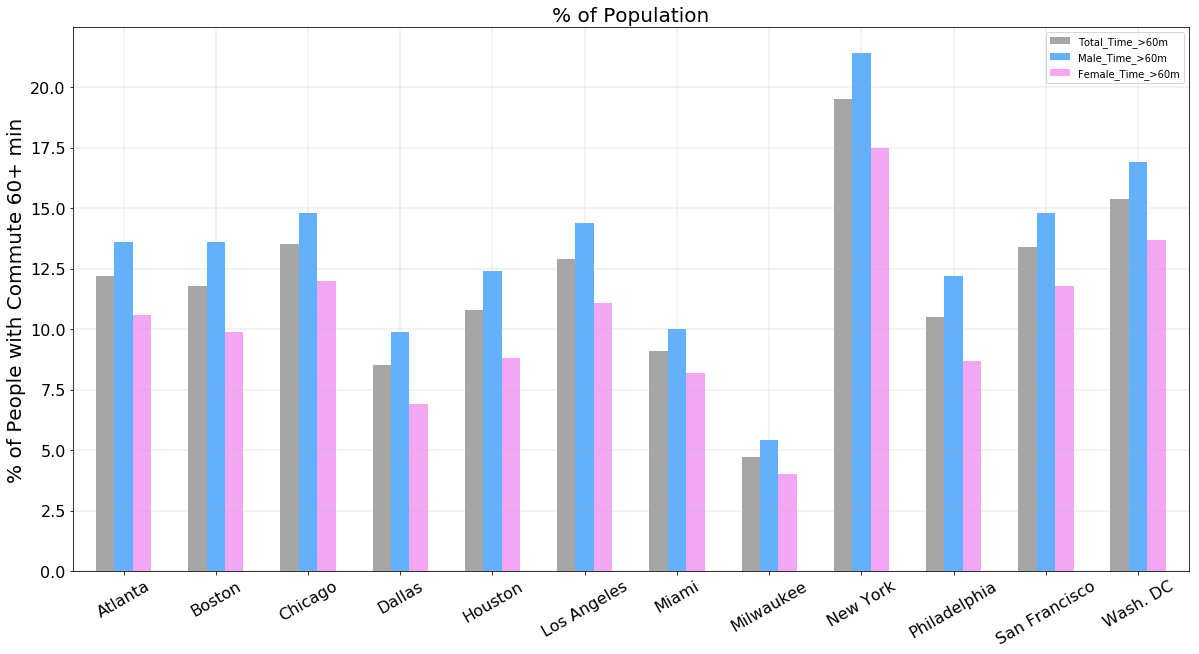

In [97]:
time_60.plot(x='CSA_Name', y=['Total_Time_>60m', 'Male_Time_>60m', 'Female_Time_>60m'],
             kind='bar', figsize=(20,10), color=['grey', 'dodgerblue', 'violet'],
             fontsize=16, width=0.6, alpha=0.7)
plt.xlabel("")
plt.ylabel("% of People with Commute 60+ min", fontsize=20)
plt.title("% of Population", fontsize=20)
plt.grid(linewidth=0.3)
#plt.yticks(np.arange(50, 101, step=5))
plt.xticks(arange(12), ('Atlanta', 'Boston', 'Chicago', 'Dallas', 'Houston', 'Los Angeles', 'Miami', 
                        'Milwaukee', 'New York', 'Philadelphia', 'San Francisco', 'Wash. DC'), 
                        fontsize='16', rotation=30)
plt.show()

# Commuting by Time of Day

alt B08132_015E   https://api.census.gov/data/2016/acs/acs5/variables.html

**12:00 a.m. to 4:59 a.m.**

In [98]:
variable = 'S0801_C01_027E'  
word = 'Time_125am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_125_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_125_total.shape)
time_125_total = time_125_total[time_125_total['combined statistical area'].isin(csa)]
time_125_total = time_125_total.rename(columns={variable : 'Total_' + word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_125_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_125_total.shape)

(174, 4)
(12, 3)


In [99]:
variable = 'S0801_C02_027E'  
word = 'Time_125am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_125_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_125_m.shape)
time_125_m = time_125_m[time_125_m['combined statistical area'].isin(csa)]
time_125_m = time_125_m.rename(columns={variable : 'Male_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_125_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_125_m.shape)

(174, 4)
(12, 3)


In [100]:
variable = 'S0801_C03_027E'  
word = 'Time_125am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_125_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_125_f.shape)
time_125_f = time_125_f[time_125_f['combined statistical area'].isin(csa)]
time_125_f = time_125_f.rename(columns={variable : 'Female_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_125_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_125_f.shape)

(174, 4)
(12, 3)


In [101]:
time_125 = pd.merge(time_125_total[['CSA_Name', 'CSA', 'Total_Time_125am']], time_125_m[['CSA', 'Male_Time_125am']])
time_125 = time_125.merge(time_125_f[['CSA', 'Female_Time_125am']])
time_125

,CSA_Name,CSA,Total_Time_125am,Male_Time_125am,Female_Time_125am
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,3.7,4.8,2.6
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,3.1,4.4,1.8
2,"Chicago-Naperville, IL-IN-WI CSA",176,4.8,6.5,3.0
3,"Dallas-Fort Worth, TX-OK CSA",206,4.2,5.3,2.8
4,"Houston-The Woodlands, TX CSA",288,4.8,6.3,2.8
5,"Los Angeles-Long Beach, CA CSA",348,6.2,8.2,3.8
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,3.1,3.9,2.2
7,"Milwaukee-Racine-Waukesha, WI CSA",376,4.6,6.2,2.9
8,"New York-Newark, NY-NJ-CT-PA CSA",408,3.0,4.2,1.7
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,3.5,5.0,2.0


**5:00 - 5:29am**

In [102]:
variable = 'S0801_C01_028E'  
word = 'Time_530am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_530_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_530_total.shape)
time_530_total = time_530_total[time_530_total['combined statistical area'].isin(csa)]
time_530_total = time_530_total.rename(columns={variable : 'Total_' + word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_530_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_530_total.shape)

(174, 4)
(12, 3)


In [103]:
variable = 'S0801_C02_028E'  
word = 'Time_530am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_530_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_530_m.shape)
time_530_m = time_530_m[time_530_m['combined statistical area'].isin(csa)]
time_530_m = time_530_m.rename(columns={variable : 'Male_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_530_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_530_m.shape)

(174, 4)
(12, 3)


In [104]:
variable = 'S0801_C03_028E'  
word = 'Time_530am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_530_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_530_f.shape)
time_530_f = time_530_f[time_530_f['combined statistical area'].isin(csa)]
time_530_f = time_530_f.rename(columns={variable : 'Female_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_530_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_530_f.shape)

(174, 4)
(12, 3)


In [105]:
time_530 = pd.merge(time_530_total[['CSA_Name', 'CSA', 'Total_Time_530am']], time_530_m[['CSA', 'Male_Time_530am']])
time_530 = time_530.merge(time_530_f[['CSA', 'Female_Time_530am']])
time_530

,CSA_Name,CSA,Total_Time_530am,Male_Time_530am,Female_Time_530am
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,3.5,4.6,2.4
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,3.2,4.5,1.8
2,"Chicago-Naperville, IL-IN-WI CSA",176,4.5,6.0,2.7
3,"Dallas-Fort Worth, TX-OK CSA",206,4.1,5.2,2.7
4,"Houston-The Woodlands, TX CSA",288,5.2,7.0,2.8
5,"Los Angeles-Long Beach, CA CSA",348,4.8,6.4,2.9
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,2.7,3.7,1.6
7,"Milwaukee-Racine-Waukesha, WI CSA",376,4.0,5.3,2.6
8,"New York-Newark, NY-NJ-CT-PA CSA",408,2.8,4.0,1.5
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,3.1,4.4,1.8


**5:30 - 5:59am**

In [106]:
variable = 'S0801_C01_029E'  
word = 'Time_600am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_600_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_600_total.shape)
time_600_total = time_600_total[time_600_total['combined statistical area'].isin(csa)]
time_600_total = time_600_total.rename(columns={variable : 'Total_' + word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_600_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_600_total.shape)

(174, 4)
(12, 3)


In [107]:
variable = 'S0801_C02_029E'  
word = 'Time_600am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_600_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_600_m.shape)
time_600_m = time_600_m[time_600_m['combined statistical area'].isin(csa)]
time_600_m = time_600_m.rename(columns={variable : 'Male_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_600_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_600_m.shape)

(174, 4)
(12, 3)


In [108]:
variable = 'S0801_C03_029E'  
word = 'Time_600am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_600_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_600_f.shape)
time_600_f = time_600_f[time_600_f['combined statistical area'].isin(csa)]
time_600_f = time_600_f.rename(columns={variable : 'Female_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_600_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_600_f.shape)

(174, 4)
(12, 3)


In [109]:
time_600 = pd.merge(time_600_total[['CSA_Name', 'CSA', 'Total_Time_600am']], time_600_m[['CSA', 'Male_Time_600am']])
time_600 = time_600.merge(time_600_f[['CSA', 'Female_Time_600am']])
time_600

,CSA_Name,CSA,Total_Time_600am,Male_Time_600am,Female_Time_600am
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,4.4,5.2,3.5
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,4.3,5.5,3.0
2,"Chicago-Naperville, IL-IN-WI CSA",176,4.9,6.1,3.6
3,"Dallas-Fort Worth, TX-OK CSA",206,4.9,5.9,3.7
4,"Houston-The Woodlands, TX CSA",288,6.1,7.6,4.2
5,"Los Angeles-Long Beach, CA CSA",348,4.8,5.8,3.5
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,2.9,3.6,2.1
7,"Milwaukee-Racine-Waukesha, WI CSA",376,5.4,6.7,4.0
8,"New York-Newark, NY-NJ-CT-PA CSA",408,3.3,4.4,2.2
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,4.3,5.6,3.0


**6:00 - 6:30am**

In [110]:
variable = 'S0801_C01_030E'  
word = 'Time_630am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_630_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_630_total.shape)
time_630_total = time_630_total[time_630_total['combined statistical area'].isin(csa)]
time_630_total = time_630_total.rename(columns={variable : 'Total_' + word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_630_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_630_total.shape)

(174, 4)
(12, 3)


In [111]:
variable = 'S0801_C02_030E'  
word = 'Time_630am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_630_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_630_m.shape)
time_630_m = time_630_m[time_630_m['combined statistical area'].isin(csa)]
time_630_m = time_630_m.rename(columns={variable : 'Male_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_630_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_630_m.shape)

(174, 4)
(12, 3)


In [112]:
variable = 'S0801_C03_030E'  
word = 'Time_630am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_630_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_630_f.shape)
time_630_f = time_630_f[time_630_f['combined statistical area'].isin(csa)]
time_630_f = time_630_f.rename(columns={variable : 'Female_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_630_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_630_f.shape)

(174, 4)
(12, 3)


In [113]:
time_630 = pd.merge(time_630_total[['CSA_Name', 'CSA', 'Total_Time_630am']], time_630_m[['CSA', 'Male_Time_630am']])
time_630 = time_630.merge(time_630_f[['CSA', 'Female_Time_630am']])
time_630

,CSA_Name,CSA,Total_Time_630am,Male_Time_630am,Female_Time_630am
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,9.5,10.6,8.4
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,8.4,10.0,6.7
2,"Chicago-Naperville, IL-IN-WI CSA",176,9.9,11.3,8.2
3,"Dallas-Fort Worth, TX-OK CSA",206,9.7,11.4,7.7
4,"Houston-The Woodlands, TX CSA",288,11.9,13.7,9.5
5,"Los Angeles-Long Beach, CA CSA",348,9.1,10.5,7.3
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,7.9,9.6,6.1
7,"Milwaukee-Racine-Waukesha, WI CSA",376,9.1,10.2,7.8
8,"New York-Newark, NY-NJ-CT-PA CSA",408,7.6,9.3,5.8
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,8.7,10.3,7.0


**6:30 - 7:00am**

In [114]:
variable = 'S0801_C01_031E'  
word = 'Time_700am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_700_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_700_total.shape)
time_700_total = time_700_total[time_700_total['combined statistical area'].isin(csa)]
time_700_total = time_700_total.rename(columns={variable : 'Total_' + word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_700_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_700_total.shape)

(174, 4)
(12, 3)


In [115]:
variable = 'S0801_C02_031E'  
word = 'Time_700am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_700_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_700_m.shape)
time_700_m = time_700_m[time_700_m['combined statistical area'].isin(csa)]
time_700_m = time_700_m.rename(columns={variable : 'Male_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_700_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_700_m.shape)

(174, 4)
(12, 3)


In [116]:
variable = 'S0801_C03_031E'  
word = 'Time_700am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_700_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_700_f.shape)
time_700_f = time_700_f[time_700_f['combined statistical area'].isin(csa)]
time_700_f = time_700_f.rename(columns={variable : 'Female_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_700_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_700_f.shape)

(174, 4)
(12, 3)


In [117]:
time_700 = pd.merge(time_700_total[['CSA_Name', 'CSA', 'Total_Time_700am']], time_700_m[['CSA', 'Male_Time_700am']])
time_700 = time_700.merge(time_700_f[['CSA', 'Female_Time_700am']])
time_700

,CSA_Name,CSA,Total_Time_700am,Male_Time_700am,Female_Time_700am
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,9.7,9.4,9.9
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,10.1,10.7,9.4
2,"Chicago-Naperville, IL-IN-WI CSA",176,9.4,9.4,9.4
3,"Dallas-Fort Worth, TX-OK CSA",206,9.6,9.7,9.5
4,"Houston-The Woodlands, TX CSA",288,10.7,10.4,11.1
5,"Los Angeles-Long Beach, CA CSA",348,8.1,7.8,8.4
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,8.2,8.5,7.9
7,"Milwaukee-Racine-Waukesha, WI CSA",376,11.1,11.3,10.8
8,"New York-Newark, NY-NJ-CT-PA CSA",408,8.2,8.6,7.6
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,9.8,10.4,9.2


**7:00 - 7:30am**

In [118]:
variable = 'S0801_C01_032E'  
word = 'Time_730am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_730_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_730_total.shape)
time_730_total = time_730_total[time_730_total['combined statistical area'].isin(csa)]
time_730_total = time_730_total.rename(columns={variable : 'Total_' + word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_730_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_730_total.shape)

(174, 4)
(12, 3)


In [119]:
variable = 'S0801_C02_032E'  
word = 'Time_730am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_730_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_730_m.shape)
time_730_m = time_730_m[time_730_m['combined statistical area'].isin(csa)]
time_730_m = time_730_m.rename(columns={variable : 'Male_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_730_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_730_m.shape)

(174, 4)
(12, 3)


In [120]:
variable = 'S0801_C03_032E'  
word = 'Time_730am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_730_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_730_f.shape)
time_730_f = time_730_f[time_730_f['combined statistical area'].isin(csa)]
time_730_f = time_730_f.rename(columns={variable : 'Female_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_730_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_730_f.shape)

(174, 4)
(12, 3)


In [121]:
time_730 = pd.merge(time_730_total[['CSA_Name', 'CSA', 'Total_Time_730am']], time_730_m[['CSA', 'Male_Time_730am']])
time_730 = time_730.merge(time_730_f[['CSA', 'Female_Time_730am']])
time_730

,CSA_Name,CSA,Total_Time_730am,Male_Time_730am,Female_Time_730am
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,15.4,14.8,16.1
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,14.7,14.7,14.7
2,"Chicago-Naperville, IL-IN-WI CSA",176,14.4,13.6,15.4
3,"Dallas-Fort Worth, TX-OK CSA",206,15.9,14.9,17.1
4,"Houston-The Woodlands, TX CSA",288,15.4,14.6,16.5
5,"Los Angeles-Long Beach, CA CSA",348,13.8,13.0,14.8
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,15.6,15.5,15.6
7,"Milwaukee-Racine-Waukesha, WI CSA",376,14.9,14.3,15.5
8,"New York-Newark, NY-NJ-CT-PA CSA",408,14.6,14.7,14.6
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,14.9,14.6,15.2


**7:30 - 8:00am**

In [122]:
variable = 'S0801_C01_033E'  
word = 'Time_800am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_800_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_800_total.shape)
time_800_total = time_800_total[time_800_total['combined statistical area'].isin(csa)]
time_800_total = time_800_total.rename(columns={variable : 'Total_' + word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_800_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_800_total.shape)

(174, 4)
(12, 3)


In [123]:
variable = 'S0801_C02_033E'  
word = 'Time_800am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_800_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_800_m.shape)
time_800_m = time_800_m[time_800_m['combined statistical area'].isin(csa)]
time_800_m = time_800_m.rename(columns={variable : 'Male_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_800_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_800_m.shape)

(174, 4)
(12, 3)


In [124]:
variable = 'S0801_C03_033E'  
word = 'Time_800am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_800_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_800_f.shape)
time_800_f = time_800_f[time_800_f['combined statistical area'].isin(csa)]
time_800_f = time_800_f.rename(columns={variable : 'Female_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_800_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_800_f.shape)

(174, 4)
(12, 3)


In [125]:
time_800 = pd.merge(time_800_total[['CSA_Name', 'CSA', 'Total_Time_800am']], time_800_m[['CSA', 'Male_Time_800am']])
time_800 = time_800.merge(time_800_f[['CSA', 'Female_Time_800am']])
time_800

,CSA_Name,CSA,Total_Time_800am,Male_Time_800am,Female_Time_800am
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,11.1,9.9,12.3
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,12.5,10.8,14.3
2,"Chicago-Naperville, IL-IN-WI CSA",176,10.7,9.0,12.5
3,"Dallas-Fort Worth, TX-OK CSA",206,12.0,10.3,14.1
4,"Houston-The Woodlands, TX CSA",288,10.3,8.7,12.4
5,"Los Angeles-Long Beach, CA CSA",348,9.6,8.1,11.5
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,11.1,9.9,12.5
7,"Milwaukee-Racine-Waukesha, WI CSA",376,12.2,10.5,14.0
8,"New York-Newark, NY-NJ-CT-PA CSA",408,11.4,9.9,13.1
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,12.3,10.6,14.1


**8:00 - 8:30am**

In [126]:
variable = 'S0801_C01_034E'  
word = 'Time_830am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_830_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_830_total.shape)
time_830_total = time_830_total[time_830_total['combined statistical area'].isin(csa)]
time_830_total = time_830_total.rename(columns={variable : 'Total_' + word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_830_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_830_total.shape)

(174, 4)
(12, 3)


In [127]:
variable = 'S0801_C02_034E'  
word = 'Time_830am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_830_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_830_m.shape)
time_830_m = time_830_m[time_830_m['combined statistical area'].isin(csa)]
time_830_m = time_830_m.rename(columns={variable : 'Male_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_830_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_830_m.shape)

(174, 4)
(12, 3)


In [128]:
variable = 'S0801_C03_034E'  
word = 'Time_830am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_830_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_830_f.shape)
time_830_f = time_830_f[time_830_f['combined statistical area'].isin(csa)]
time_830_f = time_830_f.rename(columns={variable : 'Female_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_830_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_830_f.shape)

(174, 4)
(12, 3)


In [129]:
time_830 = pd.merge(time_830_total[['CSA_Name', 'CSA', 'Total_Time_830am']], time_830_m[['CSA', 'Male_Time_830am']])
time_830 = time_830.merge(time_830_f[['CSA', 'Female_Time_830am']])
time_830

,CSA_Name,CSA,Total_Time_830am,Male_Time_830am,Female_Time_830am
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,12.2,11.7,12.7
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,13.0,11.5,14.6
2,"Chicago-Naperville, IL-IN-WI CSA",176,11.2,9.8,12.9
3,"Dallas-Fort Worth, TX-OK CSA",206,11.0,10.4,11.8
4,"Houston-The Woodlands, TX CSA",288,10.1,9.2,11.2
5,"Los Angeles-Long Beach, CA CSA",348,11.5,10.5,12.8
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,15.0,13.8,16.4
7,"Milwaukee-Racine-Waukesha, WI CSA",376,9.5,8.2,10.8
8,"New York-Newark, NY-NJ-CT-PA CSA",408,15.8,13.9,17.9
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,12.4,10.7,14.2


**8:30 - 9:00am**

In [130]:
variable = 'S0801_C01_035E'  
word = 'Time_900am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_900_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_900_total.shape)
time_900_total = time_900_total[time_900_total['combined statistical area'].isin(csa)]
time_900_total = time_900_total.rename(columns={variable : 'Total_' + word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_900_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_900_total.shape)

(174, 4)
(12, 3)


In [131]:
variable = 'S0801_C02_035E'  
word = 'Time_900am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_900_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_900_m.shape)
time_900_m = time_900_m[time_900_m['combined statistical area'].isin(csa)]
time_900_m = time_900_m.rename(columns={variable : 'Male_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_900_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_900_m.shape)

(174, 4)
(12, 3)


In [132]:
variable = 'S0801_C03_035E'  
word = 'Time_900am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_900_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_900_f.shape)
time_900_f = time_900_f[time_900_f['combined statistical area'].isin(csa)]
time_900_f = time_900_f.rename(columns={variable : 'Female_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_900_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_900_f.shape)

(174, 4)
(12, 3)


In [133]:
time_900 = pd.merge(time_900_total[['CSA_Name', 'CSA', 'Total_Time_900am']], time_900_m[['CSA', 'Male_Time_900am']])
time_900 = time_900.merge(time_900_f[['CSA', 'Female_Time_900am']])
time_900

,CSA_Name,CSA,Total_Time_900am,Male_Time_900am,Female_Time_900am
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,5.3,4.8,5.9
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,6.5,5.3,7.8
2,"Chicago-Naperville, IL-IN-WI CSA",176,5.2,4.2,6.3
3,"Dallas-Fort Worth, TX-OK CSA",206,5.0,4.4,5.7
4,"Houston-The Woodlands, TX CSA",288,4.3,3.4,5.5
5,"Los Angeles-Long Beach, CA CSA",348,5.6,4.7,6.8
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,6.6,5.7,7.6
7,"Milwaukee-Racine-Waukesha, WI CSA",376,4.1,3.4,4.9
8,"New York-Newark, NY-NJ-CT-PA CSA",408,7.8,6.3,9.5
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,6.4,5.2,7.8


**9:00am - 12:00pm**

In [134]:
variable = 'S0801_C01_036E'  
word = 'Time_1200am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_1200_total = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_1200_total.shape)
time_1200_total = time_1200_total[time_1200_total['combined statistical area'].isin(csa)]
time_1200_total = time_1200_total.rename(columns={variable : 'Total_' + word, 
                                                'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_1200_total.drop('Unnamed: 3', axis=1, inplace=True)
print(time_1200_total.shape)

(174, 4)
(12, 3)


In [135]:
variable = 'S0801_C02_036E'  
word = 'Time_1200am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_1200_m = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_1200_m.shape)
time_1200_m = time_1200_m[time_1200_m['combined statistical area'].isin(csa)]
time_1200_m = time_1200_m.rename(columns={variable : 'Male_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_1200_m.drop('Unnamed: 3', axis=1, inplace=True)
print(time_1200_m.shape)

(174, 4)
(12, 3)


In [136]:
variable = 'S0801_C03_036E'  
word = 'Time_1200am'
url = "https://api.census.gov/data/2016/acs/acs5/subject?get=NAME," + variable +\
"&for=combined%20statistical%20area:*&key=" + myAPI

resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
resp = requests.request('GET', url).content
time_1200_f = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))
print(time_1200_f.shape)
time_1200_f = time_1200_f[time_1200_f['combined statistical area'].isin(csa)]
time_1200_f = time_1200_f.rename(columns={variable : 'Female_' + word, 
                                        'combined statistical area' : 'CSA', 'NAME' : 'CSA_Name'})
time_1200_f.drop('Unnamed: 3', axis=1, inplace=True)
print(time_1200_f.shape)

(174, 4)
(12, 3)


In [137]:
time_1200 = pd.merge(time_1200_total[['CSA_Name', 'CSA', 'Total_Time_1200am']], time_1200_m[['CSA', 'Male_Time_1200am']])
time_1200 = time_1200.merge(time_1200_f[['CSA', 'Female_Time_1200am']])
time_1200

,CSA_Name,CSA,Total_Time_1200am,Male_Time_1200am,Female_Time_1200am
0,"Atlanta--Athens-Clarke County--Sandy Springs, ...",122,25.1,24.2,26.0
1,"Boston-Worcester-Providence, MA-RI-NH-CT CSA",148,24.2,22.6,26.0
2,"Chicago-Naperville, IL-IN-WI CSA",176,24.9,24.0,25.9
3,"Dallas-Fort Worth, TX-OK CSA",206,23.6,22.5,25.0
4,"Houston-The Woodlands, TX CSA",288,21.2,19.1,24.0
5,"Los Angeles-Long Beach, CA CSA",348,26.5,25.0,28.3
6,"Miami-Fort Lauderdale-Port St. Lucie, FL CSA",370,26.9,25.9,28.0
7,"Milwaukee-Racine-Waukesha, WI CSA",376,25.1,23.8,26.5
8,"New York-Newark, NY-NJ-CT-PA CSA",408,25.4,24.7,26.1
9,"Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA",428,24.5,23.2,25.9


# Census Tracts Centroids

https://www.census.gov/geo/reference/centersofpop.html

In [138]:
centroids = pd.read_csv("https://www2.census.gov/geo/docs/reference/cenpop2010/tract/CenPop2010_Mean_TR.txt")
print(centroids.shape)
centroids.head()

(74002, 6)


,STATEFP,COUNTYFP,TRACTCE,POPULATION,LATITUDE,LONGITUDE
0,1,1,20100,1912,32.475973,-86.486772
1,1,1,20200,2170,32.471763,-86.472782
2,1,1,20300,3373,32.474011,-86.459639
3,1,1,20400,4386,32.468685,-86.443021
4,1,1,20500,10766,32.465330,-86.423696


In [139]:
centroids.tail()

,STATEFP,COUNTYFP,TRACTCE,POPULATION,LATITUDE,LONGITUDE
73997,72,153,750501,4960,18.030947,-66.868030
73998,72,153,750502,2092,18.025411,-66.860207
73999,72,153,750503,2357,18.025744,-66.873776
74000,72,153,750601,5315,18.018029,-66.844223
74001,72,153,750602,3141,18.005588,-66.861211


In [140]:
centroids[centroids['STATEFP'] == 36].head(10)

,STATEFP,COUNTYFP,TRACTCE,POPULATION,LATITUDE,LONGITUDE
43195,36,1,100,2139,42.673428,-73.740151
43196,36,1,200,6046,42.660679,-73.753834
43197,36,1,300,5888,42.675832,-73.776315
43198,36,1,401,2227,42.705495,-73.867309
43199,36,1,403,4415,42.673860,-73.797756
43200,36,1,404,5203,42.686769,-73.825271
43201,36,1,501,3412,42.670160,-73.782217
43202,36,1,502,3448,42.666390,-73.786107
43203,36,1,600,3676,42.663922,-73.773815
43204,36,1,700,3821,42.665860,-73.763801


In [141]:
centroids_csa = pd.merge(geographies, centroids[['POPULATION', 'LATITUDE', 'LONGITUDE', 'TRACTCE']], on='TRACTCE')
print(centroids_csa.shape)
centroids_csa.head()

(397465, 12)


,STATEFP,COUNTYFP,TRACTCE,PUMA5CE,state&county,state&county&tract,state&tract,CSA Code,CSA Title,POPULATION,LATITUDE,LONGITUDE
0,6,1,420100,101,6_1,6_1_420100,6_420100,488,"San Jose-San Francisco-Oakland, CA",2355,37.894631,-122.290916
1,6,1,420100,101,6_1,6_1_420100,6_420100,488,"San Jose-San Francisco-Oakland, CA",1441,41.783273,-87.588614
2,6,1,420100,101,6_1,6_1_420100,6_420100,488,"San Jose-San Francisco-Oakland, CA",3623,39.277678,-76.497065
3,6,1,420100,101,6_1,6_1_420100,6_420100,488,"San Jose-San Francisco-Oakland, CA",7804,42.186538,-71.045976
4,6,1,420100,101,6_1,6_1_420100,6_420100,488,"San Jose-San Francisco-Oakland, CA",4594,39.864443,-84.532823
